**Proyecto Final Procesamiento de Datos distribuidos**

**Geoffrey Pasaje Vidal - A00380495**

# **1. Cargar Datos**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* **Products**

In [ ]:
categories = pd.read_csv('/content/drive/MyDrive/Procesamiento De Datos Distribuidos/DataSet/Products/Categories.csv',  delimiter='|', header=None,
    names=['ID_Categoria', 'Nombre_Categoria'])

In [ ]:
ProductsCategories = pd.read_csv('/content/drive/MyDrive/Procesamiento De Datos Distribuidos/DataSet/Products/ProductCategory.csv',
    delimiter='|',)

* **Transactions**

In [ ]:
transactions_102 = pd.read_csv(
    '/content/drive/MyDrive/Procesamiento De Datos Distribuidos/DataSet/Transactions/102_Tran.csv',
    delimiter='|',
    names=['Fecha', 'ID_Tienda', 'ID_Transaccion', 'ID_Productos']
)

In [ ]:
transactions_103 = pd.read_csv('/content/drive/MyDrive/Procesamiento De Datos Distribuidos/DataSet/Transactions/103_Tran.csv',
    delimiter='|',
    header=None,
    names=['Fecha', 'ID_Tienda', 'ID_Transaccion', 'ID_Productos'] )

In [ ]:
transactions_107 = pd.read_csv('/content/drive/MyDrive/Procesamiento De Datos Distribuidos/DataSet/Transactions/107_Tran.csv',
    delimiter='|',
    header=None,
    names=['Fecha', 'ID_Tienda', 'ID_Transaccion', 'ID_Productos'] )

In [ ]:
transactions_110 = pd.read_csv('/content/drive/MyDrive/Procesamiento De Datos Distribuidos/DataSet/Transactions/110_Tran.csv',
    delimiter='|',
    header=None,
    names=['Fecha', 'ID_Tienda', 'ID_Transaccion', 'ID_Productos'] )

# **2. Revision inicial del Dataset**

## **2.1 Ver las primeras filas (estructura) y Número de registros y columnas (forma):**

* **Products**

In [ ]:
categories.head()

,ID_Categoria,Nombre_Categoria
0,1,GRUPO FRUVER-EXCEPCIONES
1,2,CONCESIONARIOS
2,3,VERDURAS DE FRUTOS
3,4,CUIDADO DE LA ROPA
4,5,PANES-TOSTADAS


In [ ]:
categories.shape

(50, 2)

In [ ]:
ProductsCategories = ProductsCategories.rename(columns={
    'v.Code_pr': 'ID_Producto',
    'v.code': 'ID_Categoria'
})

In [ ]:
ProductsCategories.head()

,ID_Producto,ID_Categoria
0,1007,1
1,1009,1
2,1015,1
3,1017,1
4,1051676,1


In [ ]:
ProductsCategories.shape

(112010, 2)

* **Transactions**

In [ ]:
transactions_102.head()

,Fecha,ID_Tienda,ID_Transaccion,ID_Productos
0,2013-01-01,102,530,20 3 1
1,2013-01-01,102,587,6 29 43 21 34 2 10 32
2,2013-01-01,102,1508,9 17
3,2013-01-01,102,2365,49
4,2013-01-01,102,5009,14 38


In [ ]:
transactions_102.shape

(314286, 4)

In [ ]:
transactions_103.head()

,Fecha,ID_Tienda,ID_Transaccion,ID_Productos
0,2013-01-01,103,198,21 5 189 341 60 32 6 3 50
1,2013-01-01,103,326,395
2,2013-01-01,103,665,126 39 10 15 14 93 115 82 6 13 5 67 18 200 60 ...
3,2013-01-01,103,921,4 16 26 18 20 41 5
4,2013-01-01,103,1614,65 48 108 26 6 45 12 68 15 83 11 10


In [ ]:
transactions_103.shape

(407130, 4)

In [ ]:
transactions_107.head()

,Fecha,ID_Tienda,ID_Transaccion,ID_Productos
0,2013-01-01,107,4235,22 16 12 31 102 10 3 34 35 9 33
1,2013-01-01,107,4482,224 187
2,2013-01-01,107,7466,91 50
3,2013-01-01,107,18221,28 51 98 97 108 143 62 70 36 123
4,2013-01-01,107,18787,96 18 8 75 260 49


In [ ]:
transactions_107.shape

(254633, 4)

In [ ]:
transactions_110.head()

,Fecha,ID_Tienda,ID_Transaccion,ID_Productos
0,2013-01-01,110,1023,129 53 106 4 29 7 6 5 18 230 50 82 11
1,2013-01-01,110,1044,112 16 81 10 167 172 319 409 91
2,2013-01-01,110,3842,40 98 16 10 14 90 15 78 6 72
3,2013-01-01,110,3879,118 186
4,2013-01-01,110,4396,14 20 8 6 26 16 18 5 55 27 10 46 22 59 182 21 52


In [ ]:
transactions_110.shape

(132938, 4)

## **2.2 Tipos de datos y conteo de nulos (resumen completo): df.info()**

In [ ]:
ProductsCategories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112010 entries, 0 to 112009
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   ID_Producto   112010 non-null  int64
 1   ID_Categoria  112010 non-null  int64
dtypes: int64(2)
memory usage: 1.7 MB


In [ ]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_Categoria      50 non-null     int64 
 1   Nombre_Categoria  50 non-null     object
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes


In [ ]:
transactions_102.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314286 entries, 0 to 314285
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Fecha           314286 non-null  object
 1   ID_Tienda       314286 non-null  int64 
 2   ID_Transaccion  314286 non-null  int64 
 3   ID_Productos    314286 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.6+ MB


In [ ]:
transactions_103.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407130 entries, 0 to 407129
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Fecha           407130 non-null  object
 1   ID_Tienda       407130 non-null  int64 
 2   ID_Transaccion  407130 non-null  int64 
 3   ID_Productos    407130 non-null  object
dtypes: int64(2), object(2)
memory usage: 12.4+ MB


In [ ]:
transactions_107.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254633 entries, 0 to 254632
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Fecha           254633 non-null  object
 1   ID_Tienda       254633 non-null  int64 
 2   ID_Transaccion  254633 non-null  int64 
 3   ID_Productos    254633 non-null  object
dtypes: int64(2), object(2)
memory usage: 7.8+ MB


In [ ]:
transactions_110.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132938 entries, 0 to 132937
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Fecha           132938 non-null  object
 1   ID_Tienda       132938 non-null  int64 
 2   ID_Transaccion  132938 non-null  int64 
 3   ID_Productos    132938 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.1+ MB


## **2.3 Conteo de valores faltantes (nulos) por columna y Conteo de filas duplicadas**

In [ ]:
categories.isnull().sum()

,0
ID_Categoria,0
Nombre_Categoria,0


In [ ]:
categories.duplicated().sum()

np.int64(0)

In [ ]:
ProductsCategories.isnull().sum()

,0
ID_Producto,0
ID_Categoria,0


In [ ]:
ProductsCategories.duplicated().sum()

np.int64(18473)

In [ ]:
transactions_102.isnull().sum()

,0
Fecha,0
ID_Tienda,0
ID_Transaccion,0
ID_Productos,0


In [ ]:
transactions_102.duplicated().sum()

np.int64(0)

In [ ]:
transactions_103.isnull().sum()

,0
Fecha,0
ID_Tienda,0
ID_Transaccion,0
ID_Productos,0


In [ ]:
transactions_103.duplicated().sum()

np.int64(1)

In [ ]:
transactions_107.isnull().sum()

,0
Fecha,0
ID_Tienda,0
ID_Transaccion,0
ID_Productos,0


In [ ]:
transactions_107.duplicated().sum()

np.int64(0)

In [ ]:
transactions_110.isnull().sum()

,0
Fecha,0
ID_Tienda,0
ID_Transaccion,0
ID_Productos,0


In [ ]:
transactions_110.duplicated().sum()

np.int64(0)

## **2.4 Pre-Procesamiento de la columna ID_Productos**

* Paso 1: Convertir el string de productos a una lista real

In [ ]:
transactions_102['Productos_Lista'] = transactions_102['ID_Productos'].str.split(' ')

In [ ]:
transactions_103['Productos_Lista'] = transactions_103['ID_Productos'].str.split(' ')

In [ ]:
transactions_107['Productos_Lista'] = transactions_107['ID_Productos'].str.split(' ')

In [ ]:
transactions_110['Productos_Lista'] = transactions_110['ID_Productos'].str.split(' ')

* Paso 2: "Explotar" (Explode) la lista de products_id en filas

In [ ]:
transactions_102_exploded = transactions_102.explode('Productos_Lista')
transactions_102_exploded = transactions_102_exploded.rename(columns={'Productos_Lista': 'ID_Producto'})

In [ ]:
transactions_103_exploded = transactions_103.explode('Productos_Lista')
transactions_103_exploded = transactions_103_exploded.rename(columns={'Productos_Lista': 'ID_Producto'})

In [ ]:
transactions_107_exploded = transactions_107.explode('Productos_Lista')
transactions_107_exploded = transactions_107_exploded.rename(columns={'Productos_Lista': 'ID_Producto'})

In [ ]:
transactions_110_exploded = transactions_110.explode('Productos_Lista')
transactions_110_exploded = transactions_110_exploded.rename(columns={'Productos_Lista': 'ID_Producto'})

* Paso 3: Limpieza final

In [ ]:
transactions_102_exploded['ID_Producto'] = pd.to_numeric(transactions_102_exploded['ID_Producto'], errors='coerce')

transactions_102_exploded = transactions_102_exploded.dropna(subset=['ID_Producto'])

transactions_102_exploded['ID_Producto'] = transactions_102_exploded['ID_Producto'].astype(int)
transactions_102_exploded = transactions_102_exploded.drop(columns=['ID_Productos'])

In [ ]:
transactions_102_exploded

,Fecha,ID_Tienda,ID_Transaccion,ID_Producto
0,2013-01-01,102,530,20
0,2013-01-01,102,530,3
0,2013-01-01,102,530,1
1,2013-01-01,102,587,6
1,2013-01-01,102,587,29
...,...,...,...,...
314284,2013-06-30,102,1006774,8
314284,2013-06-30,102,1006774,5
314284,2013-06-30,102,1006774,2
314284,2013-06-30,102,1006774,9


In [ ]:
transactions_102.shape

(314286, 5)

In [ ]:
transactions_103_exploded['ID_Producto'] = pd.to_numeric(transactions_103_exploded['ID_Producto'], errors='coerce')

transactions_103_exploded = transactions_103_exploded.dropna(subset=['ID_Producto'])

transactions_103_exploded['ID_Producto'] = transactions_103_exploded['ID_Producto'].astype(int)

transactions_103_exploded = transactions_103_exploded.drop(columns=['ID_Productos'])

In [ ]:
transactions_103_exploded

,Fecha,ID_Tienda,ID_Transaccion,ID_Producto
0,2013-01-01,103,198,21
0,2013-01-01,103,198,5
0,2013-01-01,103,198,189
0,2013-01-01,103,198,341
0,2013-01-01,103,198,60
...,...,...,...,...
407128,2013-06-30,103,1008831,7
407128,2013-06-30,103,1008831,144
407128,2013-06-30,103,1008831,75
407129,2013-06-30,103,1008848,3


In [ ]:
transactions_107_exploded['ID_Producto'] = pd.to_numeric(transactions_107_exploded['ID_Producto'], errors='coerce')

transactions_107_exploded = transactions_107_exploded.dropna(subset=['ID_Producto'])

transactions_107_exploded['ID_Producto'] = transactions_107_exploded['ID_Producto'].astype(int)

transactions_107_exploded = transactions_107_exploded.drop(columns=['ID_Productos'])

In [ ]:
transactions_107_exploded

,Fecha,ID_Tienda,ID_Transaccion,ID_Producto
0,2013-01-01,107,4235,22
0,2013-01-01,107,4235,16
0,2013-01-01,107,4235,12
0,2013-01-01,107,4235,31
0,2013-01-01,107,4235,102
...,...,...,...,...
254631,2013-06-30,107,1007785,78
254631,2013-06-30,107,1007785,19
254631,2013-06-30,107,1007785,152
254632,2013-06-30,107,1009223,313


In [ ]:
transactions_107.shape

(254633, 5)

In [ ]:
transactions_110_exploded['ID_Producto'] = pd.to_numeric(transactions_110_exploded['ID_Producto'], errors='coerce')

transactions_110_exploded = transactions_110_exploded.dropna(subset=['ID_Producto'])

transactions_110_exploded['ID_Producto'] = transactions_110_exploded['ID_Producto'].astype(int)

transactions_110_exploded = transactions_110_exploded.drop(columns=['ID_Productos'])

In [ ]:
transactions_110_exploded

,Fecha,ID_Tienda,ID_Transaccion,ID_Producto
0,2013-01-01,110,1023,129
0,2013-01-01,110,1023,53
0,2013-01-01,110,1023,106
0,2013-01-01,110,1023,4
0,2013-01-01,110,1023,29
...,...,...,...,...
132937,2013-06-30,110,1009412,12
132937,2013-06-30,110,1009412,247
132937,2013-06-30,110,1009412,41
132937,2013-06-30,110,1009412,67


In [ ]:
transactions_107.shape

(254633, 5)

* Paso 4: Unión de todos las tiendas

In [ ]:
todos_los_dfs = [
    transactions_102_exploded,
    transactions_103_exploded,
    transactions_107_exploded,
    transactions_110_exploded
]

df_completo = pd.concat(todos_los_dfs)


df_completo['Fecha'] = pd.to_datetime(df_completo['Fecha'])

print(f"Total de filas combinadas: {len(df_completo)}")

Total de filas combinadas: 10591793


* 5. unión entre productos y categorias

In [ ]:
productos_con_nombres = pd.merge(
    left=ProductsCategories,
    right=categories,
    on='ID_Categoria'
)

# **3. Estadísticas descriptivas generales**

## **3.1 Variables Numéricas**

* **Resumen estadístico completo (media, std, percentiles, min, max):**

In [ ]:
categories.describe()

,ID_Categoria
count,50.00000
mean,25.50000
std,14.57738
min,1.00000
25%,13.25000
50%,25.50000
75%,37.75000
max,50.00000


In [ ]:
ProductsCategories.describe()

,ID_Producto,ID_Categoria
count,1.120100e+05,112010.000000
mean,7.524710e+05,16.208258
std,7.173693e+05,13.978116
min,2.000000e+00,1.000000
25%,2.374885e+05,4.000000
50%,5.707170e+05,12.000000
75%,9.398958e+05,25.000000
max,2.886285e+06,50.000000


In [ ]:
transactions_102_exploded.describe()

,ID_Tienda,ID_Transaccion,ID_Producto
count,2562327.0,2.562327e+06,2.562327e+06
mean,102.0,5.052670e+05,1.889678e+01
std,0.0,2.919452e+05,1.372863e+01
min,102.0,6.000000e+00,1.000000e+00
25%,102.0,2.526220e+05,7.000000e+00
50%,102.0,5.011930e+05,1.600000e+01
75%,102.0,7.603090e+05,2.900000e+01
max,102.0,1.009515e+06,5.000000e+01


In [ ]:
transactions_103_exploded.describe()

,ID_Tienda,ID_Transaccion,ID_Producto
count,4234392.0,4.234392e+06,4.234392e+06
mean,103.0,5.021054e+05,7.242843e+01
std,0.0,2.911848e+05,8.396049e+01
min,103.0,6.000000e+00,3.000000e+00
25%,103.0,2.513282e+05,1.600000e+01
50%,103.0,4.995890e+05,4.100000e+01
75%,103.0,7.508130e+05,9.400000e+01
max,103.0,1.009497e+06,4.490000e+02


In [ ]:
transactions_107_exploded.describe()

,ID_Tienda,ID_Transaccion,ID_Producto
count,2410968.0,2.410968e+06,2.410968e+06
mean,107.0,4.947225e+05,6.310615e+01
std,0.0,2.901069e+05,7.812284e+01
min,107.0,1.300000e+01,3.000000e+00
25%,107.0,2.493000e+05,1.600000e+01
50%,107.0,4.873560e+05,3.400000e+01
75%,107.0,7.406970e+05,7.600000e+01
max,107.0,1.009509e+06,4.490000e+02


In [ ]:
transactions_110_exploded.describe()

,ID_Tienda,ID_Transaccion,ID_Producto
count,1384106.0,1.384106e+06,1.384106e+06
mean,110.0,5.087895e+05,6.963727e+01
std,0.0,2.960405e+05,8.294832e+01
min,110.0,5.000000e+00,3.000000e+00
25%,110.0,2.454020e+05,1.500000e+01
50%,110.0,5.085900e+05,3.800000e+01
75%,110.0,7.714780e+05,8.800000e+01
max,110.0,1.009458e+06,4.490000e+02


In [ ]:
df_completo.describe()

,Fecha,ID_Tienda,ID_Transaccion,ID_Producto
count,10591793,1.059179e+07,1.059179e+07,1.059179e+07
mean,2013-04-01 00:29:54.686736384,1.045833e+02,5.020632e+05,5.699152e+01
min,2013-01-01 00:00:00,1.020000e+02,5.000000e+00,1.000000e+00
25%,2013-02-15 00:00:00,1.030000e+02,2.499110e+05,1.200000e+01
50%,2013-04-01 00:00:00,1.030000e+02,4.988490e+05,2.900000e+01
75%,2013-05-16 00:00:00,1.070000e+02,7.542540e+05,6.600000e+01
max,2013-06-30 00:00:00,1.100000e+02,1.009515e+06,4.490000e+02
std,NaN,2.789299e+00,2.917987e+05,7.501929e+01


* **Medias, Mediana y Modas**

In [ ]:
transactions_102_exploded['ID_Producto'].mode()

,ID_Producto
0,2


In [ ]:
transactions_102_exploded['ID_Producto'].median()

16.0

<Axes: >

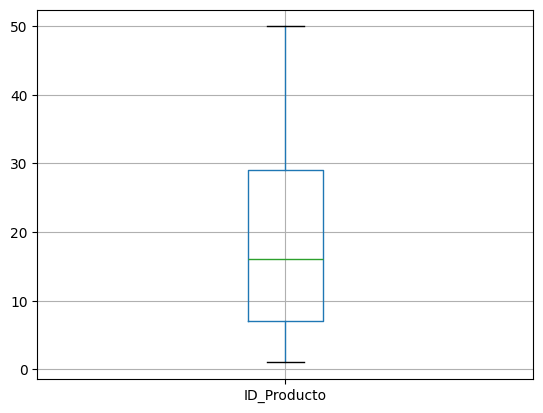

In [ ]:
transactions_102_exploded.boxplot(column=['ID_Producto'])

In [ ]:
transactions_103_exploded['ID_Producto'].mode()

,ID_Producto
0,10


In [ ]:
transactions_103_exploded['ID_Producto'].median()

41.0

<Axes: >

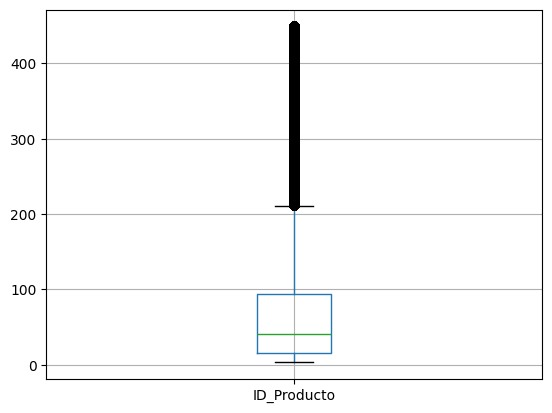

In [ ]:
transactions_103_exploded.boxplot(column=['ID_Producto'])

In [ ]:
transactions_107_exploded['ID_Producto'].mode()

,ID_Producto
0,21


In [ ]:
transactions_107_exploded['ID_Producto'].median()

34.0

<Axes: >

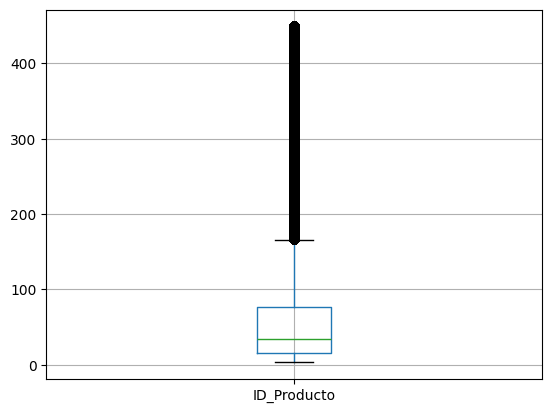

In [ ]:
transactions_107_exploded.boxplot(column=['ID_Producto'])

In [ ]:
transactions_110_exploded['ID_Producto'].mode()

,ID_Producto
0,10


In [ ]:
transactions_110_exploded['ID_Producto'].median()

38.0

<Axes: >

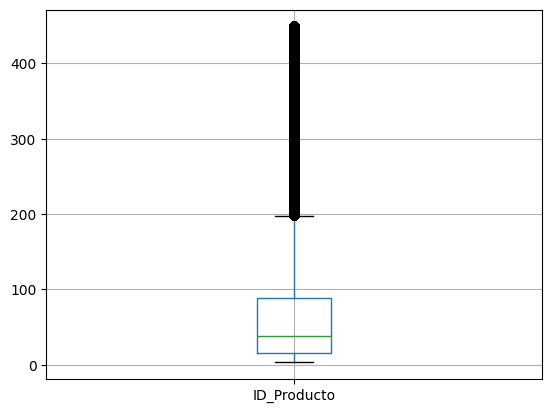

In [ ]:
transactions_110_exploded.boxplot(column=['ID_Producto'])

<Axes: >

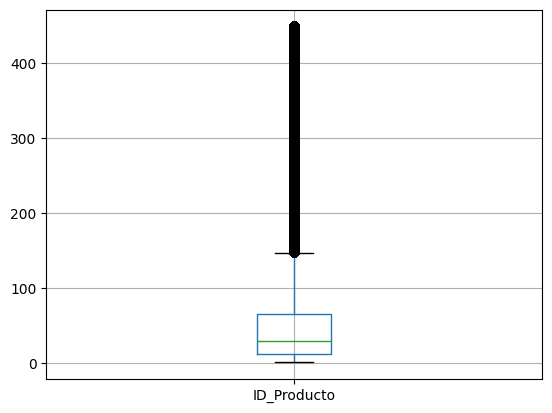

In [ ]:
df_completo.boxplot(column=['ID_Producto'])

## **3.2 Variables Categoricas**

In [ ]:
productos_con_nombres['Nombre_Categoria'].value_counts()

,count
Nombre_Categoria,
CONCESIONARIOS,23258
PASABOCAS,5279
CUIDADO DE LA COCINA,4869
GALLETAS,4541
QUESO,4260
ENLATADOS,3784
MASCOTAS,3693
DESODORANTES,3434
SALSAS,3422


In [ ]:
productos_con_nombres['Nombre_Categoria'].value_counts(normalize=True)

,proportion
Nombre_Categoria,
CONCESIONARIOS,0.207642
PASABOCAS,0.047130
CUIDADO DE LA COCINA,0.043469
GALLETAS,0.040541
QUESO,0.038032
ENLATADOS,0.033783
MASCOTAS,0.032970
DESODORANTES,0.030658
SALSAS,0.030551


In [ ]:
productos_con_nombres['Nombre_Categoria'].nunique()

50

In [ ]:
productos_con_nombres['Nombre_Categoria'].unique()

array(['GRUPO FRUVER-EXCEPCIONES', 'CONCESIONARIOS', 'VERDURAS DE FRUTOS',
       'CUIDADO DE LA ROPA', 'PANES-TOSTADAS',
       'VERDURAS RAIZ,TUBERCULO Y BULBOS', 'CARNES PROCESADAS AL VACIO',
       'QUESO', 'PASABOCAS', 'LECHE LIQUIDA', 'CUIDADO DE LA COCINA',
       'YOGURT', 'GALLETAS', 'ENLATADOS', 'GASEOSAS', 'AREPAS', 'JUGOS',
       'VERDURAS DE HOJAS', 'CEREALES', 'AROMATICAS CONDIMENTOS',
       'HUEVOS', 'SALSAS', 'AZUCAR', 'VERDURAS RAIZ,TUBE,ETC, PESO FIJO',
       'PASTAS COMESTIBLES', 'GRANOS', 'SOPAS-CREMAS-CALDOS',
       'AROMATICAS MEDICINALES', 'ACEITE DE COCINA', 'CUIDADO DE PISOS',
       'LEGUMBRES VERDES', 'PAPEL HIGIENICO', 'CONDIMENTOS',
       'BEBIDAS INSTANTANEAS', 'CEREALES PARA EL DESAYUNO',
       'JABONES DE TOCADOR', 'TORTAS Y PORQUES', 'VARIOS USOS ASEO HOGAR',
       'CONFITES', 'MASCOTAS', 'LULO NACIONAL', 'CAFE NO SOLUBLES',
       'CREMAS DENTALES', 'MARGARINAS', 'PAPAYA COMUN',
       'BANANO EXPORTACION', 'AVES', 'DESODORANTES', 'GOMAS DE MASC

In [ ]:
transactions_102_exploded['ID_Producto'].value_counts().head(10)

,count
ID_Producto,
2,113246
5,106786
10,104165
3,99093
7,90150
8,90084
1,88841
9,80490
4,80134


In [ ]:
transactions_103_exploded['ID_Producto'].value_counts().head(10)

,count
ID_Producto,
10,109054
5,101296
4,93708
12,90166
8,88345
6,88139
3,79598
11,76768
19,76744


In [ ]:
transactions_107_exploded['ID_Producto'].value_counts().head(10)

,count
ID_Producto,
21,66820
6,65727
16,62657
3,62473
5,57093
4,53202
11,51984
37,49512
20,48086


In [ ]:
transactions_110_exploded['ID_Producto'].value_counts().head(10)

,count
ID_Producto,
10,35514
5,35351
4,33374
8,28908
3,28691
12,28478
6,27811
11,26145
16,25536


# **3.2 Graficos de analisis estadisticas descriptivas**

**1. Top 10 Productos (Total)**

--- Top 10 Productos (Total) ---
ID_Producto
5     300526
10    290313
3     269855
4     260418
6     254644
8     253899
7     225877
16    224159
11    221968
9     212480
Name: count, dtype: int64


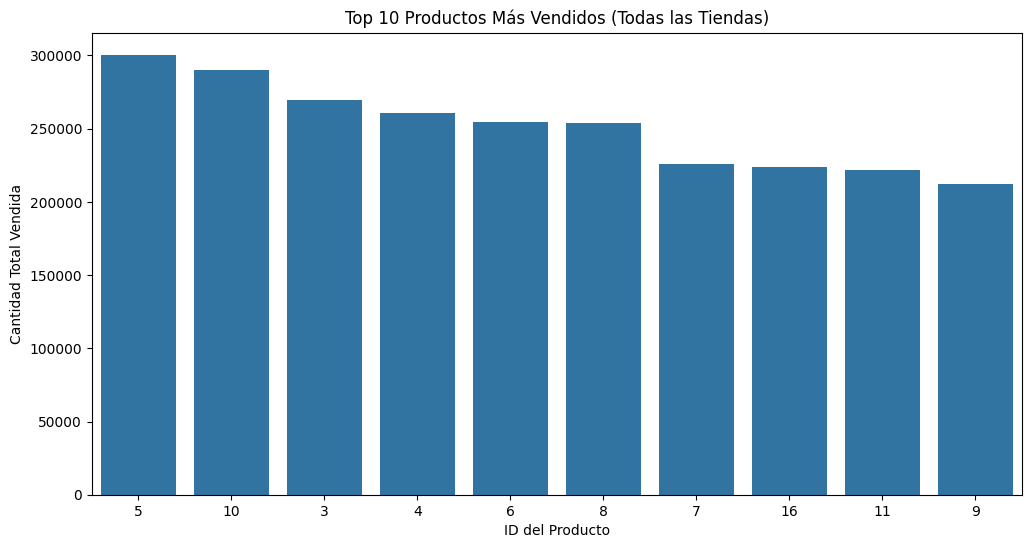

In [ ]:
top_10_productos = df_completo['ID_Producto'].value_counts().head(10)

print("--- Top 10 Productos (Total) ---")
print(top_10_productos)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_productos.index.astype(str),
    y=top_10_productos.values
)
plt.title('Top 10 Productos Más Vendidos (Todas las Tiendas)')
plt.xlabel('ID del Producto')
plt.ylabel('Cantidad Total Vendida')
plt.show()

**2. Ventas Totales por tienda**

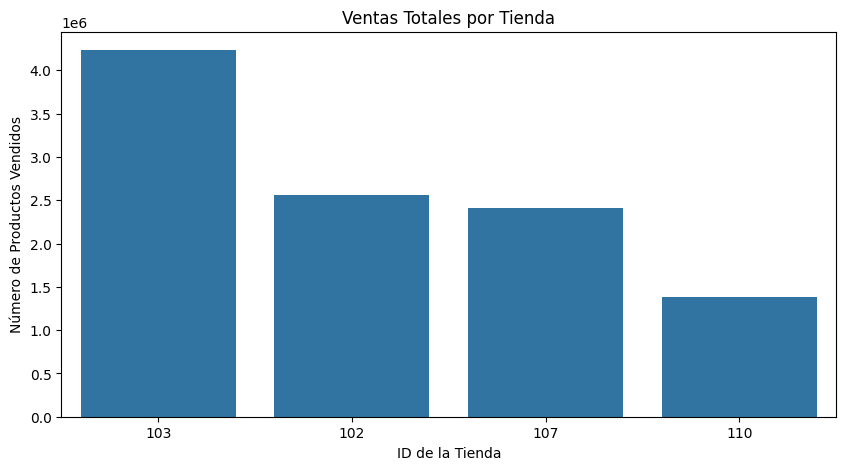

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df_completo,
    x='ID_Tienda',
    order=df_completo['ID_Tienda'].value_counts().index
)
plt.title('Ventas Totales por Tienda')
plt.xlabel('ID de la Tienda')
plt.ylabel('Número de Productos Vendidos')
plt.show()

**3. Evolución de Ventas Totales por Día**

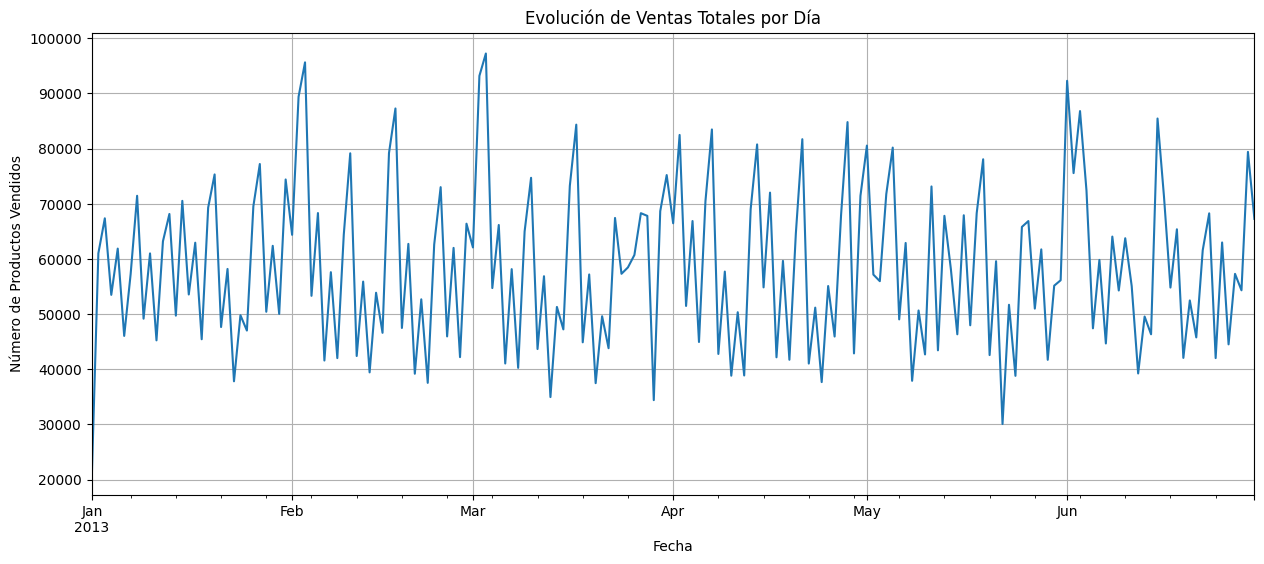

In [ ]:
ventas_por_dia = df_completo.groupby('Fecha')['ID_Producto'].count()

plt.figure(figsize=(15, 6))
ventas_por_dia.plot()
plt.title('Evolución de Ventas Totales por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Productos Vendidos')
plt.grid(True)
plt.show()

**4. Contar cuántos productos únicos hay en cada categoría**

--- Top 10 Categorías por Nro. de Productos (Catálogo) ---
Nombre_Categoria
CONCESIONARIOS          23258
PASABOCAS                5279
CUIDADO DE LA COCINA     4869
GALLETAS                 4541
QUESO                    4260
ENLATADOS                3784
MASCOTAS                 3693
DESODORANTES             3434
SALSAS                   3422
PANES-TOSTADAS           3322
Name: count, dtype: int64


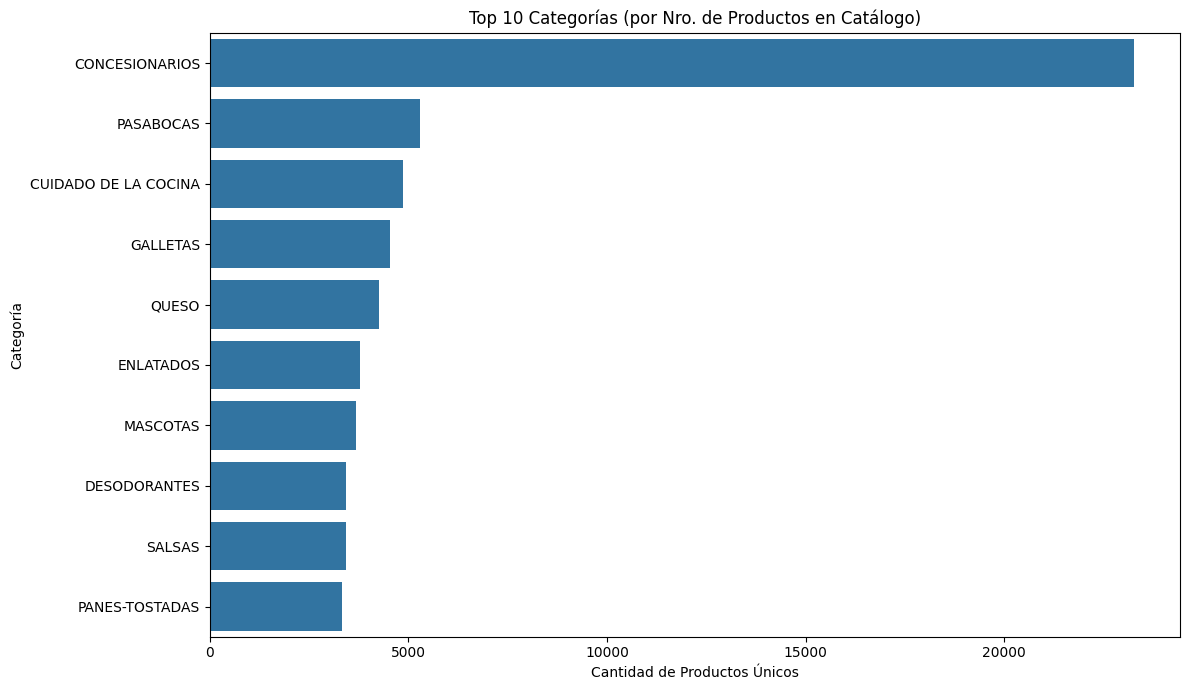

In [ ]:
conteo_catalogo = productos_con_nombres['Nombre_Categoria'].value_counts().head(10)

print("--- Top 10 Categorías por Nro. de Productos (Catálogo) ---")
print(conteo_catalogo)

plt.figure(figsize=(12, 7))
sns.barplot(
    y=conteo_catalogo.index,
    x=conteo_catalogo.values,
    orient='h'
)
plt.title('Top 10 Categorías (por Nro. de Productos en Catálogo)')
plt.xlabel('Cantidad de Productos Únicos')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

**5. Análisis de VENTAS por Categoría**

In [ ]:
df_completo

,Fecha,ID_Tienda,ID_Transaccion,ID_Producto
0,2013-01-01,102,530,20
0,2013-01-01,102,530,3
0,2013-01-01,102,530,1
1,2013-01-01,102,587,6
1,2013-01-01,102,587,29
...,...,...,...,...
132937,2013-06-30,110,1009412,12
132937,2013-06-30,110,1009412,247
132937,2013-06-30,110,1009412,41
132937,2013-06-30,110,1009412,67


In [ ]:
productos_con_nombres

,ID_Producto,ID_Categoria,Nombre_Categoria
0,1007,1,GRUPO FRUVER-EXCEPCIONES
1,1009,1,GRUPO FRUVER-EXCEPCIONES
2,1015,1,GRUPO FRUVER-EXCEPCIONES
3,1017,1,GRUPO FRUVER-EXCEPCIONES
4,1051676,1,GRUPO FRUVER-EXCEPCIONES
...,...,...,...
112005,477666,50,MANGO TOMY
112006,4932,50,MANGO TOMY
112007,5055,50,MANGO TOMY
112008,62,50,MANGO TOMY



--- Top 10 Categorías MÁS VENDIDAS (Ventas) ---
Nombre_Categoria
DESCONOCIDA                         5330800
CARNES PROCESADAS AL VACIO          1811523
VERDURAS RAIZ,TUBERCULO Y BULBOS    1811523
CUIDADO DE LA ROPA                  1410750
VERDURAS DE FRUTOS                  1410750
VERDURAS DE HOJAS                    729513
JUGOS                                729513
AROMATICAS CONDIMENTOS               493388
PASTAS COMESTIBLES                   491896
AROMATICAS MEDICINALES               294753
Name: count, dtype: int64


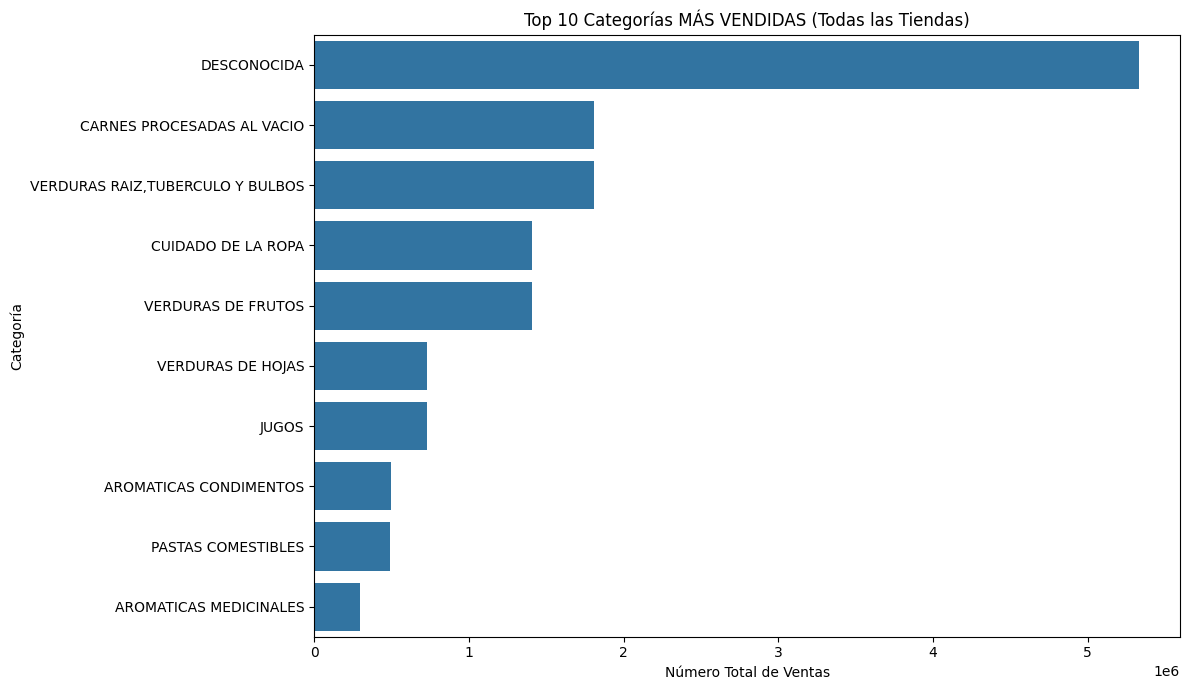

In [ ]:
df_ventas_con_nombres = pd.merge(
    left=df_completo,
    right=productos_con_nombres,
    on='ID_Producto',
    how='left'
)

df_ventas_con_nombres['Nombre_Categoria'] = df_ventas_con_nombres['Nombre_Categoria'].fillna('DESCONOCIDA')

conteo_ventas_por_cat = df_ventas_con_nombres['Nombre_Categoria'].value_counts().head(10)

print("\n--- Top 10 Categorías MÁS VENDIDAS (Ventas) ---")
print(conteo_ventas_por_cat)

plt.figure(figsize=(12, 7))
sns.barplot(
    y=conteo_ventas_por_cat.index,
    x=conteo_ventas_por_cat.values,
    orient='h'
)
plt.title('Top 10 Categorías MÁS VENDIDAS (Todas las Tiendas)')
plt.xlabel('Número Total de Ventas')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

# **4. Análisis Temporal**

## **4.1 Preparación de Datos Temporales**

In [ ]:
# Crear características temporales adicionales
df_completo['Año'] = df_completo['Fecha'].dt.year
df_completo['Mes'] = df_completo['Fecha'].dt.month
df_completo['Dia'] = df_completo['Fecha'].dt.day
df_completo['Dia_Semana'] = df_completo['Fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
df_completo['Nombre_Dia'] = df_completo['Fecha'].dt.day_name()
df_completo['Semana_Año'] = df_completo['Fecha'].dt.isocalendar().week
df_completo['Nombre_Mes'] = df_completo['Fecha'].dt.month_name()

# Verificar las nuevas columnas
print("Nuevas columnas temporales creadas:")
print(df_completo[['Fecha', 'Año', 'Mes', 'Dia', 'Dia_Semana', 'Nombre_Dia', 'Semana_Año', 'Nombre_Mes']].head(10))

## **4.2 Ventas Diarias, Semanales y Mensuales**

### **Ventas Diarias**

In [ ]:
# Agrupar ventas por día
ventas_diarias = df_completo.groupby('Fecha').agg({
    'ID_Producto': 'count',
    'ID_Transaccion': 'nunique'
}).rename(columns={
    'ID_Producto': 'Total_Productos_Vendidos',
    'ID_Transaccion': 'Numero_Transacciones'
})

print("=== VENTAS DIARIAS ===")
print(ventas_diarias.describe())
print("\nPrimeros 10 días:")
print(ventas_diarias.head(10))
print("\nÚltimos 10 días:")
print(ventas_diarias.tail(10))

In [ ]:
# Visualizar ventas diarias
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Gráfico 1: Productos vendidos por día
axes[0].plot(ventas_diarias.index, ventas_diarias['Total_Productos_Vendidos'], 
             marker='o', linewidth=2, markersize=4, color='steelblue')
axes[0].set_title('Evolución de Productos Vendidos por Día', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fecha', fontsize=12)
axes[0].set_ylabel('Total de Productos Vendidos', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Número de transacciones por día
axes[1].plot(ventas_diarias.index, ventas_diarias['Numero_Transacciones'], 
             marker='s', linewidth=2, markersize=4, color='coral')
axes[1].set_title('Evolución del Número de Transacciones por Día', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Fecha', fontsize=12)
axes[1].set_ylabel('Número de Transacciones', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Ventas Semanales**

In [ ]:
# Agrupar ventas por semana
df_completo['Año_Semana'] = df_completo['Fecha'].dt.strftime('%Y-W%U')

ventas_semanales = df_completo.groupby('Año_Semana').agg({
    'ID_Producto': 'count',
    'ID_Transaccion': 'nunique',
    'ID_Tienda': 'nunique'
}).rename(columns={
    'ID_Producto': 'Total_Productos_Vendidos',
    'ID_Transaccion': 'Numero_Transacciones',
    'ID_Tienda': 'Tiendas_Activas'
})

print("=== VENTAS SEMANALES ===")
print(ventas_semanales.describe())
print("\nPrimeras 10 semanas:")
print(ventas_semanales.head(10))
print("\nÚltimas 10 semanas:")
print(ventas_semanales.tail(10))

In [ ]:
# Visualizar ventas semanales
plt.figure(figsize=(16, 6))
x_positions = range(len(ventas_semanales))
plt.bar(x_positions, ventas_semanales['Total_Productos_Vendidos'], 
        color='mediumseagreen', alpha=0.7, edgecolor='black')
plt.title('Ventas Totales por Semana', fontsize=14, fontweight='bold')
plt.xlabel('Semana (Año-Semana)', fontsize=12)
plt.ylabel('Total de Productos Vendidos', fontsize=12)
plt.xticks(x_positions[::2], ventas_semanales.index[::2], rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### **Ventas Mensuales**

In [ ]:
# Agrupar ventas por mes
df_completo['Año_Mes'] = df_completo['Fecha'].dt.to_period('M')

ventas_mensuales = df_completo.groupby('Año_Mes').agg({
    'ID_Producto': 'count',
    'ID_Transaccion': 'nunique',
    'ID_Tienda': 'nunique'
}).rename(columns={
    'ID_Producto': 'Total_Productos_Vendidos',
    'ID_Transaccion': 'Numero_Transacciones',
    'ID_Tienda': 'Tiendas_Activas'
})

print("=== VENTAS MENSUALES ===")
print(ventas_mensuales)
print("\nEstadísticas:")
print(ventas_mensuales.describe())

In [ ]:
# Visualizar ventas mensuales
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Productos vendidos por mes
axes[0].bar(range(len(ventas_mensuales)), ventas_mensuales['Total_Productos_Vendidos'], 
            color='royalblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Productos Vendidos por Mes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mes', fontsize=12)
axes[0].set_ylabel('Total de Productos Vendidos', fontsize=12)
axes[0].set_xticks(range(len(ventas_mensuales)))
axes[0].set_xticklabels(ventas_mensuales.index.astype(str), rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Número de transacciones por mes
axes[1].plot(range(len(ventas_mensuales)), ventas_mensuales['Numero_Transacciones'], 
             marker='o', linewidth=2.5, markersize=8, color='crimson')
axes[1].set_title('Número de Transacciones por Mes', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mes', fontsize=12)
axes[1].set_ylabel('Número de Transacciones', fontsize=12)
axes[1].set_xticks(range(len(ventas_mensuales)))
axes[1].set_xticklabels(ventas_mensuales.index.astype(str), rotation=45, ha='right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **4.3 Picos de Ventas por Día de la Semana**

In [ ]:
# Análisis de ventas por día de la semana
ventas_por_dia_semana = df_completo.groupby('Nombre_Dia').agg({
    'ID_Producto': 'count',
    'ID_Transaccion': 'nunique'
}).rename(columns={
    'ID_Producto': 'Total_Productos',
    'ID_Transaccion': 'Numero_Transacciones'
})

# Ordenar por días de la semana (Lunes a Domingo)
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_semana = ventas_por_dia_semana.reindex(dias_orden)

# Traducir los nombres de días al español
traduccion_dias = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
ventas_por_dia_semana.index = ventas_por_dia_semana.index.map(traduccion_dias)

print("=== VENTAS POR DÍA DE LA SEMANA ===")
print(ventas_por_dia_semana)
print(f"\nDía con MAYORES ventas: {ventas_por_dia_semana['Total_Productos'].idxmax()} ({ventas_por_dia_semana['Total_Productos'].max()} productos)")
print(f"Día con MENORES ventas: {ventas_por_dia_semana['Total_Productos'].idxmin()} ({ventas_por_dia_semana['Total_Productos'].min()} productos)")

In [ ]:
# Visualizar ventas por día de la semana
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Barras para productos vendidos
colors = ['crimson' if x == ventas_por_dia_semana['Total_Productos'].max() 
          else 'lightcoral' for x in ventas_por_dia_semana['Total_Productos']]
axes[0].bar(ventas_por_dia_semana.index, ventas_por_dia_semana['Total_Productos'], 
            color=colors, edgecolor='black', alpha=0.8)
axes[0].set_title('Productos Vendidos por Día de la Semana', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Día de la Semana', fontsize=12)
axes[0].set_ylabel('Total de Productos Vendidos', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Línea para número de transacciones
axes[1].plot(ventas_por_dia_semana.index, ventas_por_dia_semana['Numero_Transacciones'], 
             marker='o', linewidth=3, markersize=10, color='darkgreen')
axes[1].fill_between(range(len(ventas_por_dia_semana)), 
                      ventas_por_dia_semana['Numero_Transacciones'], 
                      alpha=0.3, color='green')
axes[1].set_title('Número de Transacciones por Día de la Semana', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Día de la Semana', fontsize=12)
axes[1].set_ylabel('Número de Transacciones', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Heatmap de ventas por día de la semana y semana del año
ventas_heatmap = df_completo.groupby(['Semana_Año', 'Dia_Semana'])['ID_Producto'].count().unstack(fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(ventas_heatmap, cmap='YlOrRd', annot=False, fmt='d', 
            cbar_kws={'label': 'Productos Vendidos'}, linewidths=0.5)
plt.title('Mapa de Calor: Ventas por Semana del Año y Día de la Semana', fontsize=14, fontweight='bold')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)', fontsize=12)
plt.ylabel('Semana del Año', fontsize=12)
plt.tight_layout()
plt.show()

## **4.4 Tendencias y Estacionalidad**

### **Análisis de Tendencia con Media Móvil**

In [ ]:
# Calcular medias móviles para suavizar la tendencia
ventas_diarias_sorted = ventas_diarias.sort_index()
ventas_diarias_sorted['MA_7'] = ventas_diarias_sorted['Total_Productos_Vendidos'].rolling(window=7).mean()
ventas_diarias_sorted['MA_14'] = ventas_diarias_sorted['Total_Productos_Vendidos'].rolling(window=14).mean()
ventas_diarias_sorted['MA_30'] = ventas_diarias_sorted['Total_Productos_Vendidos'].rolling(window=30).mean()

print("=== MEDIAS MÓVILES ===")
print(ventas_diarias_sorted[['Total_Productos_Vendidos', 'MA_7', 'MA_14', 'MA_30']].tail(15))

In [ ]:
# Visualizar tendencias con medias móviles
plt.figure(figsize=(18, 8))
plt.plot(ventas_diarias_sorted.index, ventas_diarias_sorted['Total_Productos_Vendidos'], 
         label='Ventas Diarias', alpha=0.4, color='gray', linewidth=1)
plt.plot(ventas_diarias_sorted.index, ventas_diarias_sorted['MA_7'], 
         label='Media Móvil 7 días', linewidth=2, color='blue')
plt.plot(ventas_diarias_sorted.index, ventas_diarias_sorted['MA_14'], 
         label='Media Móvil 14 días', linewidth=2, color='orange')
plt.plot(ventas_diarias_sorted.index, ventas_diarias_sorted['MA_30'], 
         label='Media Móvil 30 días', linewidth=2.5, color='red')

plt.title('Tendencia de Ventas con Medias Móviles', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Productos Vendidos', fontsize=12)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Análisis de Estacionalidad Mensual**

In [ ]:
# Análisis de ventas por mes (número del mes)
ventas_por_mes = df_completo.groupby('Mes').agg({
    'ID_Producto': 'count',
    'ID_Transaccion': 'nunique'
}).rename(columns={
    'ID_Producto': 'Total_Productos',
    'ID_Transaccion': 'Numero_Transacciones'
})

# Nombres de meses en español
meses_nombres = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

print("=== ESTACIONALIDAD POR MES ===")
for mes, row in ventas_por_mes.iterrows():
    mes_nombre = meses_nombres.get(mes, f'Mes {mes}')
    print(f"{mes_nombre}: {row['Total_Productos']} productos, {row['Numero_Transacciones']} transacciones")

print(f"\nMes con MAYORES ventas: {meses_nombres[ventas_por_mes['Total_Productos'].idxmax()]} ({ventas_por_mes['Total_Productos'].max()} productos)")
print(f"Mes con MENORES ventas: {meses_nombres[ventas_por_mes['Total_Productos'].idxmin()]} ({ventas_por_mes['Total_Productos'].min()} productos)")

In [ ]:
# Visualizar estacionalidad por mes
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico 1: Productos vendidos por mes
mes_labels = [meses_nombres[i] for i in ventas_por_mes.index]
axes[0].bar(mes_labels, ventas_por_mes['Total_Productos'], 
            color='teal', alpha=0.7, edgecolor='black')
axes[0].set_title('Estacionalidad: Productos Vendidos por Mes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mes', fontsize=12)
axes[0].set_ylabel('Total de Productos Vendidos', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Gráfico polar para visualizar el patrón cíclico
axes[1] = plt.subplot(2, 1, 2, projection='polar')
theta = np.linspace(0, 2 * np.pi, len(ventas_por_mes), endpoint=False)
radii = ventas_por_mes['Total_Productos'].values
width = 2 * np.pi / len(ventas_por_mes)

bars = axes[1].bar(theta, radii, width=width, bottom=0.0, alpha=0.7, color='coral', edgecolor='black')
axes[1].set_theta_zero_location('N')
axes[1].set_theta_direction(-1)
axes[1].set_xticks(theta)
axes[1].set_xticklabels(mes_labels)
axes[1].set_title('Patrón Cíclico de Ventas por Mes', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### **Descomposición de Series Temporales (Tendencia, Estacionalidad, Residuo)**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Preparar serie temporal para descomposición
serie_temporal = ventas_diarias_sorted['Total_Productos_Vendidos'].fillna(method='ffill')

# Descomposición aditiva
decomposition = seasonal_decompose(serie_temporal, model='additive', period=7)

# Extraer componentes
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

print("=== DESCOMPOSICIÓN DE SERIE TEMPORAL ===")
print("Componentes extraídos: Tendencia, Estacionalidad (patrón semanal), Residuo")

In [ ]:
# Visualizar la descomposición
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

# Serie original
axes[0].plot(serie_temporal.index, serie_temporal, color='navy')
axes[0].set_title('Serie Temporal Original', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Ventas', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Tendencia
axes[1].plot(tendencia.index, tendencia, color='darkgreen', linewidth=2)
axes[1].set_title('Tendencia', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Tendencia', fontsize=10)
axes[1].grid(True, alpha=0.3)

# Estacionalidad
axes[2].plot(estacionalidad.index, estacionalidad, color='orange', linewidth=1.5)
axes[2].set_title('Estacionalidad (Patrón Semanal)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Estacionalidad', fontsize=10)
axes[2].grid(True, alpha=0.3)

# Residuo
axes[3].plot(residuo.index, residuo, color='red', linewidth=1)
axes[3].set_title('Residuo (Ruido)', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Residuo', fontsize=10)
axes[3].set_xlabel('Fecha', fontsize=10)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **Análisis de Crecimiento y Tasas de Cambio**

In [ ]:
# Calcular tasas de crecimiento
ventas_mensuales_num = ventas_mensuales.copy()
ventas_mensuales_num.index = ventas_mensuales_num.index.astype(str)

# Tasa de crecimiento mensual
ventas_mensuales_num['Crecimiento_Mensual'] = ventas_mensuales_num['Total_Productos_Vendidos'].pct_change() * 100
ventas_mensuales_num['Crecimiento_Transacciones'] = ventas_mensuales_num['Numero_Transacciones'].pct_change() * 100

print("=== TASAS DE CRECIMIENTO MENSUAL ===")
print(ventas_mensuales_num[['Total_Productos_Vendidos', 'Crecimiento_Mensual', 
                             'Numero_Transacciones', 'Crecimiento_Transacciones']])

In [ ]:
# Visualizar tasas de crecimiento
fig, ax = plt.subplots(figsize=(14, 6))

x_pos = range(len(ventas_mensuales_num))
colors = ['green' if x >= 0 else 'red' for x in ventas_mensuales_num['Crecimiento_Mensual'].fillna(0)]

ax.bar(x_pos, ventas_mensuales_num['Crecimiento_Mensual'].fillna(0), 
       color=colors, alpha=0.7, edgecolor='black')
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_title('Tasa de Crecimiento Mensual de Ventas (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Crecimiento (%)', fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(ventas_mensuales_num.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### **Resumen del Análisis Temporal**

In [ ]:
print("=" * 80)
print("RESUMEN DEL ANÁLISIS TEMPORAL DE VENTAS")
print("=" * 80)

# 1. Ventas Diarias
print("\n1. VENTAS DIARIAS:")
print(f"   - Promedio diario: {ventas_diarias['Total_Productos_Vendidos'].mean():.2f} productos")
print(f"   - Máximo en un día: {ventas_diarias['Total_Productos_Vendidos'].max()} productos")
print(f"   - Mínimo en un día: {ventas_diarias['Total_Productos_Vendidos'].min()} productos")
print(f"   - Desviación estándar: {ventas_diarias['Total_Productos_Vendidos'].std():.2f}")

# 2. Ventas Semanales
print("\n2. VENTAS SEMANALES:")
print(f"   - Promedio semanal: {ventas_semanales['Total_Productos_Vendidos'].mean():.2f} productos")
print(f"   - Máximo en una semana: {ventas_semanales['Total_Productos_Vendidos'].max()} productos")
print(f"   - Mínimo en una semana: {ventas_semanales['Total_Productos_Vendidos'].min()} productos")

# 3. Ventas Mensuales
print("\n3. VENTAS MENSUALES:")
print(f"   - Promedio mensual: {ventas_mensuales['Total_Productos_Vendidos'].mean():.2f} productos")
print(f"   - Máximo en un mes: {ventas_mensuales['Total_Productos_Vendidos'].max()} productos")
print(f"   - Mínimo en un mes: {ventas_mensuales['Total_Productos_Vendidos'].min()} productos")

# 4. Picos por día de la semana
print("\n4. PICOS POR DÍA DE LA SEMANA:")
print(f"   - Día con MAYORES ventas: {ventas_por_dia_semana['Total_Productos'].idxmax()}")
print(f"     ({ventas_por_dia_semana['Total_Productos'].max()} productos)")
print(f"   - Día con MENORES ventas: {ventas_por_dia_semana['Total_Productos'].idxmin()}")
print(f"     ({ventas_por_dia_semana['Total_Productos'].min()} productos)")

# 5. Estacionalidad mensual
print("\n5. ESTACIONALIDAD MENSUAL:")
print(f"   - Mes con MAYORES ventas: {meses_nombres[ventas_por_mes['Total_Productos'].idxmax()]}")
print(f"     ({ventas_por_mes['Total_Productos'].max()} productos)")
print(f"   - Mes con MENORES ventas: {meses_nombres[ventas_por_mes['Total_Productos'].idxmin()]}")
print(f"     ({ventas_por_mes['Total_Productos'].min()} productos)")

# 6. Tendencia general
print("\n6. TENDENCIA GENERAL:")
primera_semana = ventas_semanales['Total_Productos_Vendidos'].iloc[0]
ultima_semana = ventas_semanales['Total_Productos_Vendidos'].iloc[-1]
cambio_total = ((ultima_semana - primera_semana) / primera_semana) * 100
print(f"   - Cambio desde la primera a la última semana: {cambio_total:+.2f}%")
if cambio_total > 0:
    print(f"   - Tendencia: CRECIENTE ↑")
elif cambio_total < 0:
    print(f"   - Tendencia: DECRECIENTE ↓")
else:
    print(f"   - Tendencia: ESTABLE →")

print("\n" + "=" * 80)

# **5. Análisis por Cliente**

## **5.1 Preparación de Datos de Clientes**

En este dataset, usaremos `ID_Transaccion` como proxy para identificar a los clientes, ya que cada transacción representa una compra única.

In [ ]:
# Crear un identificador único para cada cliente (basado en ID_Transaccion)
# Asumiremos que cada transacción única representa un evento de compra de un cliente

# Crear dataset de clientes agrupando por transacción
df_clientes = df_completo.groupby('ID_Transaccion').agg({
    'Fecha': 'first',  # Primera fecha de la transacción
    'ID_Tienda': 'first',  # Tienda donde se realizó
    'ID_Producto': 'count'  # Cantidad de productos en la transacción
}).rename(columns={
    'Fecha': 'Fecha_Compra',
    'ID_Tienda': 'Tienda',
    'ID_Producto': 'Productos_Comprados'
}).reset_index()

print("=== DATOS DE CLIENTES (Transacciones) ===")
print(f"Total de transacciones (clientes): {len(df_clientes)}")
print("\nPrimeras transacciones:")
print(df_clientes.head(10))
print("\nEstadísticas:")
print(df_clientes.describe())

## **5.2 Frecuencia de Compra**

In [ ]:
# Análisis de frecuencia de compra
# Distribución de productos comprados por transacción
frecuencia_productos = df_clientes['Productos_Comprados'].value_counts().sort_index()

print("=== FRECUENCIA DE COMPRA ===")
print("\nDistribución de productos por transacción:")
print(frecuencia_productos.head(20))

print(f"\nPromedio de productos por transacción: {df_clientes['Productos_Comprados'].mean():.2f}")
print(f"Mediana de productos por transacción: {df_clientes['Productos_Comprados'].median():.0f}")
print(f"Máximo de productos en una transacción: {df_clientes['Productos_Comprados'].max()}")
print(f"Mínimo de productos en una transacción: {df_clientes['Productos_Comprados'].min()}")

# Calcular transacciones por periodo
df_clientes['Fecha_Compra'] = pd.to_datetime(df_clientes['Fecha_Compra'])
df_clientes['Año_Mes'] = df_clientes['Fecha_Compra'].dt.to_period('M')

transacciones_por_mes = df_clientes.groupby('Año_Mes').size()
print(f"\nPromedio de transacciones por mes: {transacciones_por_mes.mean():.2f}")

In [ ]:
# Visualizar frecuencia de compra
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Distribución de productos por transacción (histograma)
axes[0, 0].hist(df_clientes['Productos_Comprados'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribución de Productos por Transacción', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Número de Productos', fontsize=10)
axes[0, 0].set_ylabel('Frecuencia (Transacciones)', fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].axvline(df_clientes['Productos_Comprados'].mean(), color='red', 
                    linestyle='--', linewidth=2, label=f'Media: {df_clientes["Productos_Comprados"].mean():.2f}')
axes[0, 0].legend()

# Gráfico 2: Top 15 frecuencias más comunes
top_frecuencias = frecuencia_productos.head(15)
axes[0, 1].bar(top_frecuencias.index.astype(str), top_frecuencias.values, 
               color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Top 15 Cantidades de Productos Más Frecuentes', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Productos en la Transacción', fontsize=10)
axes[0, 1].set_ylabel('Número de Transacciones', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Gráfico 3: Transacciones por mes
axes[1, 0].plot(transacciones_por_mes.index.astype(str), transacciones_por_mes.values, 
                marker='o', linewidth=2, markersize=8, color='green')
axes[1, 0].set_title('Número de Transacciones por Mes', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Mes', fontsize=10)
axes[1, 0].set_ylabel('Transacciones', fontsize=10)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Box plot de productos por transacción
axes[1, 1].boxplot(df_clientes['Productos_Comprados'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_title('Box Plot: Productos por Transacción', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Número de Productos', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## **5.3 Tiempo Promedio entre Compras**

Analizaremos patrones temporales de las compras para entender el comportamiento de retorno de los clientes.

In [ ]:
# Calcular tiempo entre transacciones consecutivas
df_clientes_sorted = df_clientes.sort_values('Fecha_Compra').reset_index(drop=True)

# Calcular diferencia entre fechas consecutivas
df_clientes_sorted['Dias_Desde_Compra_Anterior'] = df_clientes_sorted['Fecha_Compra'].diff().dt.days

# Eliminar el primer valor (que es NaN)
tiempos_entre_compras = df_clientes_sorted['Dias_Desde_Compra_Anterior'].dropna()

print("=== TIEMPO ENTRE COMPRAS ===")
print(f"\nPromedio de días entre compras: {tiempos_entre_compras.mean():.2f} días")
print(f"Mediana de días entre compras: {tiempos_entre_compras.median():.2f} días")
print(f"Desviación estándar: {tiempos_entre_compras.std():.2f} días")
print(f"Mínimo tiempo entre compras: {tiempos_entre_compras.min():.0f} días")
print(f"Máximo tiempo entre compras: {tiempos_entre_compras.max():.0f} días")

# Percentiles
print("\nPercentiles:")
print(f"25%: {tiempos_entre_compras.quantile(0.25):.2f} días")
print(f"50%: {tiempos_entre_compras.quantile(0.50):.2f} días")
print(f"75%: {tiempos_entre_compras.quantile(0.75):.2f} días")
print(f"90%: {tiempos_entre_compras.quantile(0.90):.2f} días")

# Análisis por rangos de tiempo
print("\n=== DISTRIBUCIÓN POR RANGOS ===")
rangos = {
    'Mismo día (0 días)': (tiempos_entre_compras == 0).sum(),
    '1 día': (tiempos_entre_compras == 1).sum(),
    '2-7 días': ((tiempos_entre_compras >= 2) & (tiempos_entre_compras <= 7)).sum(),
    '8-14 días': ((tiempos_entre_compras >= 8) & (tiempos_entre_compras <= 14)).sum(),
    '15-30 días': ((tiempos_entre_compras >= 15) & (tiempos_entre_compras <= 30)).sum(),
    'Más de 30 días': (tiempos_entre_compras > 30).sum()
}

for rango, count in rangos.items():
    porcentaje = (count / len(tiempos_entre_compras)) * 100
    print(f"{rango}: {count} compras ({porcentaje:.2f}%)")

In [ ]:
# Visualizar tiempo entre compras
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Histograma de días entre compras (limitado a 60 días para mejor visualización)
tiempos_filtrados = tiempos_entre_compras[tiempos_entre_compras <= 60]
axes[0, 0].hist(tiempos_filtrados, bins=60, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribución de Días entre Compras (≤60 días)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Días entre Compras', fontsize=10)
axes[0, 0].set_ylabel('Frecuencia', fontsize=10)
axes[0, 0].axvline(tiempos_entre_compras.mean(), color='red', 
                    linestyle='--', linewidth=2, label=f'Media: {tiempos_entre_compras.mean():.2f}')
axes[0, 0].axvline(tiempos_entre_compras.median(), color='green', 
                    linestyle='--', linewidth=2, label=f'Mediana: {tiempos_entre_compras.median():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Gráfico 2: Distribución por rangos de tiempo
rangos_nombres = list(rangos.keys())
rangos_valores = list(rangos.values())
colors_rangos = plt.cm.viridis(np.linspace(0, 1, len(rangos)))
axes[0, 1].barh(rangos_nombres, rangos_valores, color=colors_rangos, edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Compras por Rango de Tiempo', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Número de Compras', fontsize=10)
axes[0, 1].grid(axis='x', alpha=0.3)

# Gráfico 3: Box plot de días entre compras
axes[1, 0].boxplot([tiempos_filtrados], vert=False, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7),
                    medianprops=dict(color='darkred', linewidth=2))
axes[1, 0].set_title('Box Plot: Días entre Compras (≤60 días)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Días', fontsize=10)
axes[1, 0].grid(axis='x', alpha=0.3)

# Gráfico 4: Distribución acumulada
sorted_tiempos = np.sort(tiempos_filtrados)
cumulative = np.arange(1, len(sorted_tiempos) + 1) / len(sorted_tiempos) * 100
axes[1, 1].plot(sorted_tiempos, cumulative, linewidth=2, color='purple')
axes[1, 1].set_title('Distribución Acumulada de Días entre Compras', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Días entre Compras', fontsize=10)
axes[1, 1].set_ylabel('Porcentaje Acumulado (%)', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(50, color='red', linestyle='--', alpha=0.5, label='50%')
axes[1, 1].axhline(75, color='orange', linestyle='--', alpha=0.5, label='75%')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## **5.4 Segmentación de Clientes**

Utilizaremos diferentes criterios para segmentar a los clientes y entender mejor su comportamiento de compra.

### **Segmentación por Tamaño de Compra**

In [ ]:
# Segmentación basada en la cantidad de productos comprados
def segmentar_por_tamano_compra(productos):
    if productos <= 5:
        return 'Compra Pequeña (1-5 productos)'
    elif productos <= 15:
        return 'Compra Media (6-15 productos)'
    elif productos <= 30:
        return 'Compra Grande (16-30 productos)'
    else:
        return 'Compra Muy Grande (>30 productos)'

df_clientes['Segmento_Tamano'] = df_clientes['Productos_Comprados'].apply(segmentar_por_tamano_compra)

# Análisis de segmentos
segmentos_tamano = df_clientes['Segmento_Tamano'].value_counts()

print("=== SEGMENTACIÓN POR TAMAÑO DE COMPRA ===")
print("\nDistribución de clientes por segmento:")
for segmento, count in segmentos_tamano.items():
    porcentaje = (count / len(df_clientes)) * 100
    print(f"{segmento}: {count} transacciones ({porcentaje:.2f}%)")

# Estadísticas por segmento
print("\n=== ESTADÍSTICAS POR SEGMENTO ===")
stats_segmento = df_clientes.groupby('Segmento_Tamano')['Productos_Comprados'].agg([
    ('Promedio', 'mean'),
    ('Mediana', 'median'),
    ('Mínimo', 'min'),
    ('Máximo', 'max'),
    ('Total_Transacciones', 'count')
])
print(stats_segmento)

In [ ]:
# Visualizar segmentación por tamaño
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Pie chart de segmentos
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0, 0)  # Explotar el primer segmento
axes[0].pie(segmentos_tamano.values, labels=segmentos_tamano.index, autopct='%1.1f%%',
            colors=colors_pie, explode=explode, shadow=True, startangle=90)
axes[0].set_title('Distribución de Clientes por Tamaño de Compra', fontsize=12, fontweight='bold')

# Gráfico 2: Barras con estadísticas por segmento
segmentos_ordenados = ['Compra Pequeña (1-5 productos)', 'Compra Media (6-15 productos)', 
                       'Compra Grande (16-30 productos)', 'Compra Muy Grande (>30 productos)']
valores_ordenados = [segmentos_tamano.get(seg, 0) for seg in segmentos_ordenados]

axes[1].barh(range(len(segmentos_ordenados)), valores_ordenados, 
             color=colors_pie, edgecolor='black', alpha=0.8)
axes[1].set_yticks(range(len(segmentos_ordenados)))
axes[1].set_yticklabels(segmentos_ordenados)
axes[1].set_title('Número de Transacciones por Segmento', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Número de Transacciones', fontsize=10)
axes[1].grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(valores_ordenados):
    axes[1].text(v + max(valores_ordenados) * 0.01, i, str(v), 
                 va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### **Segmentación por Tienda**

In [ ]:
# Análisis de clientes por tienda
clientes_por_tienda = df_clientes.groupby('Tienda').agg({
    'ID_Transaccion': 'count',
    'Productos_Comprados': ['mean', 'sum']
}).round(2)

clientes_por_tienda.columns = ['Total_Transacciones', 'Promedio_Productos_Transaccion', 'Total_Productos_Vendidos']
clientes_por_tienda = clientes_por_tienda.sort_values('Total_Transacciones', ascending=False)

print("=== SEGMENTACIÓN POR TIENDA ===")
print(clientes_por_tienda)

# Calcular participación de mercado
clientes_por_tienda['Participacion_%'] = (clientes_por_tienda['Total_Transacciones'] / 
                                           clientes_por_tienda['Total_Transacciones'].sum() * 100).round(2)

print("\n=== PARTICIPACIÓN DE MERCADO ===")
print(clientes_por_tienda[['Total_Transacciones', 'Participacion_%']])

In [ ]:
# Visualizar análisis por tienda
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Transacciones por tienda
tiendas = clientes_por_tienda.index.astype(str)
axes[0, 0].bar(tiendas, clientes_por_tienda['Total_Transacciones'], 
               color='dodgerblue', edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Número de Transacciones por Tienda', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('ID Tienda', fontsize=10)
axes[0, 0].set_ylabel('Transacciones', fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)

# Gráfico 2: Participación de mercado
axes[0, 1].pie(clientes_por_tienda['Participacion_%'], labels=tiendas, autopct='%1.1f%%',
               colors=plt.cm.Set3.colors, shadow=True, startangle=90)
axes[0, 1].set_title('Participación de Mercado por Tienda', fontsize=12, fontweight='bold')

# Gráfico 3: Promedio de productos por transacción por tienda
axes[1, 0].barh(tiendas, clientes_por_tienda['Promedio_Productos_Transaccion'], 
                color='lightgreen', edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Promedio de Productos por Transacción (por Tienda)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Promedio de Productos', fontsize=10)
axes[1, 0].set_ylabel('ID Tienda', fontsize=10)
axes[1, 0].grid(axis='x', alpha=0.3)

# Gráfico 4: Total de productos vendidos por tienda
axes[1, 1].bar(tiendas, clientes_por_tienda['Total_Productos_Vendidos'], 
               color='coral', edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Total de Productos Vendidos por Tienda', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('ID Tienda', fontsize=10)
axes[1, 1].set_ylabel('Productos Vendidos', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### **Segmentación RFM Simplificada**

RFM: Recency (Recencia), Frequency (Frecuencia), Monetary (Valor Monetario - aproximado por cantidad de productos)

In [ ]:
# Análisis RFM simplificado
# Fecha de referencia (última fecha del dataset + 1 día)
fecha_referencia = df_clientes['Fecha_Compra'].max() + pd.Timedelta(days=1)

# Calcular métricas RFM por cliente (usando ID_Transaccion como proxy de cliente único)
# Para un análisis más realista, se podría crear un ID de cliente basado en patrones

# Agrupar todas las transacciones para crear perfil temporal
df_clientes['Recencia_Dias'] = (fecha_referencia - df_clientes['Fecha_Compra']).dt.days

# Crear bins para categorizar
# Recencia (días desde la última compra)
df_clientes['Recencia_Categoria'] = pd.cut(
    df_clientes['Recencia_Dias'],
    bins=[0, 30, 60, 90, float('inf')],
    labels=['Muy Reciente (<30d)', 'Reciente (30-60d)', 'Moderado (60-90d)', 'Antiguo (>90d)']
)

# Frecuencia aproximada (productos comprados como proxy)
df_clientes['Frecuencia_Categoria'] = pd.cut(
    df_clientes['Productos_Comprados'],
    bins=[0, 5, 15, 30, float('inf')],
    labels=['Baja (1-5)', 'Media (6-15)', 'Alta (16-30)', 'Muy Alta (>30)']
)

print("=== ANÁLISIS RFM SIMPLIFICADO ===")
print("\n--- Distribución por Recencia ---")
print(df_clientes['Recencia_Categoria'].value_counts().sort_index())

print("\n--- Distribución por Frecuencia ---")
print(df_clientes['Frecuencia_Categoria'].value_counts().sort_index())

# Crear segmentos combinados
df_clientes['Segmento_RFM'] = (
    df_clientes['Recencia_Categoria'].astype(str) + ' / ' + 
    df_clientes['Frecuencia_Categoria'].astype(str)
)

print("\n--- Top 10 Segmentos RFM ---")
top_rfm = df_clientes['Segmento_RFM'].value_counts().head(10)
for seg, count in top_rfm.items():
    print(f"{seg}: {count} transacciones")

In [ ]:
# Visualizar análisis RFM
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Distribución por Recencia
recencia_counts = df_clientes['Recencia_Categoria'].value_counts().sort_index()
axes[0, 0].bar(range(len(recencia_counts)), recencia_counts.values, 
               color='salmon', edgecolor='black', alpha=0.8)
axes[0, 0].set_xticks(range(len(recencia_counts)))
axes[0, 0].set_xticklabels(recencia_counts.index, rotation=45, ha='right')
axes[0, 0].set_title('Distribución de Clientes por Recencia', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Número de Transacciones', fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)

# Gráfico 2: Distribución por Frecuencia
frecuencia_counts = df_clientes['Frecuencia_Categoria'].value_counts().sort_index()
axes[0, 1].bar(range(len(frecuencia_counts)), frecuencia_counts.values, 
               color='lightblue', edgecolor='black', alpha=0.8)
axes[0, 1].set_xticks(range(len(frecuencia_counts)))
axes[0, 1].set_xticklabels(frecuencia_counts.index, rotation=45, ha='right')
axes[0, 1].set_title('Distribución de Clientes por Frecuencia', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Número de Transacciones', fontsize=10)
axes[0, 1].grid(axis='y', alpha=0.3)

# Gráfico 3: Heatmap Recencia vs Frecuencia
rfm_pivot = pd.crosstab(
    df_clientes['Recencia_Categoria'], 
    df_clientes['Frecuencia_Categoria']
)
sns.heatmap(rfm_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1, 0], 
            cbar_kws={'label': 'Número de Transacciones'})
axes[1, 0].set_title('Matriz RFM: Recencia vs Frecuencia', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Frecuencia', fontsize=10)
axes[1, 0].set_ylabel('Recencia', fontsize=10)

# Gráfico 4: Top 10 segmentos RFM
top_10_rfm = df_clientes['Segmento_RFM'].value_counts().head(10)
axes[1, 1].barh(range(len(top_10_rfm)), top_10_rfm.values, 
                color=plt.cm.viridis(np.linspace(0, 1, len(top_10_rfm))), 
                edgecolor='black', alpha=0.8)
axes[1, 1].set_yticks(range(len(top_10_rfm)))
axes[1, 1].set_yticklabels([label[:40] + '...' if len(label) > 40 else label 
                             for label in top_10_rfm.index], fontsize=8)
axes[1, 1].set_title('Top 10 Segmentos RFM', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Número de Transacciones', fontsize=10)
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### **Clustering K-Means para Segmentación Avanzada**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparar datos para clustering
# Características: Recencia (días), Productos Comprados
df_clustering = df_clientes[['Recencia_Dias', 'Productos_Comprados']].copy()

# Normalizar los datos
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Encontrar el número óptimo de clusters usando el método del codo
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering_scaled)
    inertias.append(kmeans.inertia_)

print("=== MÉTODO DEL CODO ===")
print("Inercias por número de clusters:")
for k, inertia in zip(K_range, inertias):
    print(f"K={k}: {inertia:.2f}")

In [ ]:
# Visualizar método del codo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linewidth=2, markersize=8, color='purple')
plt.title('Método del Codo para Determinar K Óptimo', fontsize=14, fontweight='bold')
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Aplicar K-Means con K óptimo (usaremos K=4 basado en el análisis)
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df_clientes['Cluster'] = kmeans.fit_predict(df_clustering_scaled)

print(f"\n=== CLUSTERING CON K={k_optimo} ===")
print("\nDistribución de clientes por cluster:")
print(df_clientes['Cluster'].value_counts().sort_index())

# Analizar características de cada cluster
print("\n=== CARACTERÍSTICAS DE CADA CLUSTER ===")
cluster_stats = df_clientes.groupby('Cluster').agg({
    'Recencia_Dias': ['mean', 'median'],
    'Productos_Comprados': ['mean', 'median'],
    'ID_Transaccion': 'count'
}).round(2)

cluster_stats.columns = ['Recencia_Media', 'Recencia_Mediana', 
                         'Productos_Media', 'Productos_Mediana', 'Total_Transacciones']
print(cluster_stats)

# Nombrar los clusters según sus características
def nombrar_cluster(row):
    if row['Recencia_Media'] < 30 and row['Productos_Media'] > 15:
        return 'Clientes Premium Activos'
    elif row['Recencia_Media'] < 30 and row['Productos_Media'] <= 15:
        return 'Clientes Activos Regulares'
    elif row['Recencia_Media'] >= 30 and row['Productos_Media'] > 15:
        return 'Clientes Premium Inactivos'
    else:
        return 'Clientes en Riesgo'

cluster_names = cluster_stats.apply(nombrar_cluster, axis=1)
print("\n=== NOMBRES DE CLUSTERS ===")
for i, name in cluster_names.items():
    print(f"Cluster {i}: {name}")

In [ ]:
# Visualizar clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Scatter plot de clusters
colors = ['red', 'blue', 'green', 'orange']
for i in range(k_optimo):
    cluster_data = df_clientes[df_clientes['Cluster'] == i]
    axes[0].scatter(cluster_data['Recencia_Dias'], cluster_data['Productos_Comprados'],
                   c=colors[i], label=f'Cluster {i}: {cluster_names[i]}', alpha=0.6, s=50)

# Agregar centroides
centroides_originales = scaler.inverse_transform(kmeans.cluster_centers_)
axes[0].scatter(centroides_originales[:, 0], centroides_originales[:, 1],
               c='black', marker='X', s=300, edgecolors='white', linewidths=2,
               label='Centroides')

axes[0].set_title('Segmentación de Clientes (K-Means)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Recencia (días)', fontsize=10)
axes[0].set_ylabel('Productos Comprados', fontsize=10)
axes[0].legend(fontsize=8, loc='best')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Distribución de transacciones por cluster
cluster_counts = df_clientes['Cluster'].value_counts().sort_index()
cluster_labels = [f'C{i}: {cluster_names[i][:20]}...' for i in cluster_counts.index]

axes[1].bar(range(len(cluster_counts)), cluster_counts.values, 
           color=colors, edgecolor='black', alpha=0.8)
axes[1].set_xticks(range(len(cluster_counts)))
axes[1].set_xticklabels(cluster_labels, rotation=45, ha='right')
axes[1].set_title('Distribución de Transacciones por Cluster', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Número de Transacciones', fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### **Resumen del Análisis por Cliente**

In [ ]:
print("=" * 80)
print("RESUMEN DEL ANÁLISIS POR CLIENTE")
print("=" * 80)

# 1. Frecuencia de Compra
print("\n1. FRECUENCIA DE COMPRA:")
print(f"   - Total de transacciones: {len(df_clientes)}")
print(f"   - Promedio de productos por transacción: {df_clientes['Productos_Comprados'].mean():.2f}")
print(f"   - Mediana de productos por transacción: {df_clientes['Productos_Comprados'].median():.0f}")
print(f"   - Rango: {df_clientes['Productos_Comprados'].min()} - {df_clientes['Productos_Comprados'].max()} productos")
print(f"   - Promedio de transacciones por mes: {transacciones_por_mes.mean():.2f}")

# 2. Tiempo entre Compras
print("\n2. TIEMPO PROMEDIO ENTRE COMPRAS:")
print(f"   - Promedio: {tiempos_entre_compras.mean():.2f} días")
print(f"   - Mediana: {tiempos_entre_compras.median():.2f} días")
print(f"   - Rango: {tiempos_entre_compras.min():.0f} - {tiempos_entre_compras.max():.0f} días")
print(f"   - 75% de las compras ocurren en menos de: {tiempos_entre_compras.quantile(0.75):.2f} días")

# 3. Segmentación por Tamaño
print("\n3. SEGMENTACIÓN POR TAMAÑO DE COMPRA:")
for segmento, count in segmentos_tamano.items():
    porcentaje = (count / len(df_clientes)) * 100
    print(f"   - {segmento}: {porcentaje:.1f}%")

# 4. Segmentación por Tienda
print("\n4. DISTRIBUCIÓN POR TIENDA:")
for tienda in clientes_por_tienda.index:
    transacciones = clientes_por_tienda.loc[tienda, 'Total_Transacciones']
    participacion = clientes_por_tienda.loc[tienda, 'Participacion_%']
    print(f"   - Tienda {tienda}: {transacciones} transacciones ({participacion}%)")

# 5. Clusters
print("\n5. SEGMENTACIÓN AVANZADA (CLUSTERS):")
for i in range(k_optimo):
    count = (df_clientes['Cluster'] == i).sum()
    porcentaje = (count / len(df_clientes)) * 100
    print(f"   - {cluster_names[i]}: {count} transacciones ({porcentaje:.1f}%)")
    print(f"     * Recencia promedio: {cluster_stats.loc[i, 'Recencia_Media']:.1f} días")
    print(f"     * Productos promedio: {cluster_stats.loc[i, 'Productos_Media']:.1f}")

# 6. Insights Clave
print("\n6. INSIGHTS CLAVE:")
print(f"   - El segmento más grande: {segmentos_tamano.idxmax()} ({segmentos_tamano.max()} transacciones)")
print(f"   - Tienda líder: Tienda {clientes_por_tienda['Total_Transacciones'].idxmax()} "
      f"({clientes_por_tienda['Total_Transacciones'].max()} transacciones)")
print(f"   - Mayoría de compras ocurren en: {rangos_nombres[np.argmax(rangos_valores)]}")

print("\n" + "=" * 80)

# **6. Análisis por Producto**

## **6.1 Productos Más Vendidos**

In [ ]:
# Análisis de productos más vendidos
productos_mas_vendidos = df_completo['ID_Producto'].value_counts()

print("=== PRODUCTOS MÁS VENDIDOS ===")
print(f"\nTotal de productos únicos vendidos: {df_completo['ID_Producto'].nunique()}")
print(f"Total de ventas (items): {len(df_completo)}")

print("\n--- Top 20 Productos Más Vendidos ---")
top_20_productos = productos_mas_vendidos.head(20)
for i, (producto, ventas) in enumerate(top_20_productos.items(), 1):
    porcentaje = (ventas / len(df_completo)) * 100
    print(f"{i:2d}. Producto {producto}: {ventas} unidades ({porcentaje:.2f}%)")

print(f"\nProducto más vendido: ID {productos_mas_vendidos.index[0]} con {productos_mas_vendidos.values[0]} unidades")
print(f"Producto menos vendido: ID {productos_mas_vendidos.index[-1]} con {productos_mas_vendidos.values[-1]} unidades")

# Análisis de concentración (Pareto)
ventas_acumuladas = productos_mas_vendidos.cumsum()
porcentaje_acumulado = (ventas_acumuladas / len(df_completo)) * 100

productos_80 = (porcentaje_acumulado <= 80).sum()
print(f"\nPrincipio de Pareto (80/20):")
print(f"El 80% de las ventas proviene de {productos_80} productos ({productos_80/df_completo['ID_Producto'].nunique()*100:.2f}% del catálogo)")

In [ ]:
# Visualizar productos más vendidos
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico 1: Top 20 productos más vendidos
axes[0, 0].barh(range(20), top_20_productos.values[::-1], 
                color=plt.cm.viridis(np.linspace(0, 1, 20)), 
                edgecolor='black', alpha=0.8)
axes[0, 0].set_yticks(range(20))
axes[0, 0].set_yticklabels([f'Prod {id}' for id in top_20_productos.index[::-1]], fontsize=9)
axes[0, 0].set_title('Top 20 Productos Más Vendidos', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Unidades Vendidas', fontsize=10)
axes[0, 0].grid(axis='x', alpha=0.3)

# Gráfico 2: Distribución de ventas por producto (histograma)
axes[0, 1].hist(productos_mas_vendidos.values, bins=50, color='steelblue', 
                edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribución de Ventas por Producto', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Unidades Vendidas', fontsize=10)
axes[0, 1].set_ylabel('Número de Productos', fontsize=10)
axes[0, 1].set_yscale('log')
axes[0, 1].grid(axis='y', alpha=0.3)

# Gráfico 3: Curva de Pareto
num_productos = range(1, len(productos_mas_vendidos) + 1)
axes[1, 0].plot(num_productos, porcentaje_acumulado.values, 
                linewidth=2.5, color='darkgreen')
axes[1, 0].axhline(y=80, color='red', linestyle='--', linewidth=2, label='80% de ventas')
axes[1, 0].axvline(x=productos_80, color='orange', linestyle='--', linewidth=2, 
                   label=f'{productos_80} productos (80%)')
axes[1, 0].set_title('Curva de Pareto: Concentración de Ventas', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Número de Productos (ordenados por ventas)', fontsize=10)
axes[1, 0].set_ylabel('% Acumulado de Ventas', fontsize=10)
axes[1, 0].legend(fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Top 15 productos - Pie chart
top_15 = productos_mas_vendidos.head(15)
otros = productos_mas_vendidos[15:].sum()
labels = [f'Prod {id}' for id in top_15.index] + ['Otros']
sizes = list(top_15.values) + [otros]

axes[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
               colors=plt.cm.tab20.colors)
axes[1, 1].set_title('Top 15 Productos + Otros', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### **Productos Más Vendidos por Tienda**

In [ ]:
# Análisis de productos más vendidos por tienda
print("=== TOP 10 PRODUCTOS POR TIENDA ===\n")

tiendas_unicas = df_completo['ID_Tienda'].unique()
top_productos_por_tienda = {}

for tienda in sorted(tiendas_unicas):
    df_tienda = df_completo[df_completo['ID_Tienda'] == tienda]
    top_10 = df_tienda['ID_Producto'].value_counts().head(10)
    top_productos_por_tienda[tienda] = top_10
    
    print(f"--- Tienda {tienda} ---")
    for i, (producto, ventas) in enumerate(top_10.items(), 1):
        print(f"  {i}. Producto {producto}: {ventas} unidades")
    print()

In [ ]:
# Visualizar comparación de top productos por tienda
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, tienda in enumerate(sorted(tiendas_unicas)):
    top_10 = top_productos_por_tienda[tienda]
    
    axes[idx].barh(range(10), top_10.values[::-1], 
                   color=plt.cm.Set2.colors[idx], 
                   edgecolor='black', alpha=0.8)
    axes[idx].set_yticks(range(10))
    axes[idx].set_yticklabels([f'Prod {id}' for id in top_10.index[::-1]], fontsize=9)
    axes[idx].set_title(f'Top 10 Productos - Tienda {tienda}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Unidades Vendidas', fontsize=9)
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## **6.2 Reglas de Asociación (Market Basket Analysis)**

Utilizaremos el algoritmo Apriori para encontrar patrones de productos que se compran frecuentemente juntos.

### **Instalación de mlxtend (si es necesario)**

In [ ]:
# Instalar mlxtend si no está disponible
!pip install mlxtend -q

### **Preparación de Datos para Market Basket Analysis**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Preparar datos en formato de canasta (basket)
# Agrupar productos por transacción
transacciones = df_completo.groupby('ID_Transaccion')['ID_Producto'].apply(list).values

print("=== PREPARACIÓN DE DATOS PARA MARKET BASKET ANALYSIS ===")
print(f"Total de transacciones: {len(transacciones)}")
print(f"Primeras 5 transacciones:")
for i, trans in enumerate(transacciones[:5], 1):
    print(f"  Transacción {i}: {len(trans)} productos - {trans[:10]}{'...' if len(trans) > 10 else ''}")

# Convertir a formato one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transacciones).transform(transacciones)
df_basket = pd.DataFrame(te_ary, columns=te.columns_)

print(f"\nDimensiones de la matriz de transacciones: {df_basket.shape}")
print(f"Productos únicos: {len(df_basket.columns)}")

### **Algoritmo Apriori - Conjuntos Frecuentes**

In [ ]:
# Aplicar algoritmo Apriori para encontrar conjuntos frecuentes
# min_support: mínimo % de transacciones que deben contener el conjunto
print("Aplicando algoritmo Apriori...")
frequent_itemsets = apriori(df_basket, min_support=0.01, use_colnames=True)

print(f"\n=== CONJUNTOS FRECUENTES (min_support=0.01) ===")
print(f"Total de conjuntos frecuentes encontrados: {len(frequent_itemsets)}")

# Ordenar por soporte
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)

print("\n--- Top 20 Conjuntos Frecuentes ---")
for idx, row in frequent_itemsets.head(20).iterrows():
    items = list(row['itemsets'])
    support = row['support']
    print(f"  {items}: {support:.4f} ({support*100:.2f}%)")

### **Reglas de Asociación**

In [ ]:
# Generar reglas de asociación
# Métricas:
# - Confidence (confianza): P(B|A) = P(A y B) / P(A)
# - Lift: P(A y B) / (P(A) * P(B)) - Mide cuánto más probable es B dado A
# - Leverage: P(A y B) - P(A) * P(B)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values('lift', ascending=False)

print(f"\n=== REGLAS DE ASOCIACIÓN (min_lift=1.0) ===")
print(f"Total de reglas encontradas: {len(rules)}")

# Explicación de métricas
print("\n--- Explicación de Métricas ---")
print("Support (Soporte): % de transacciones que contienen ambos productos")
print("Confidence (Confianza): Probabilidad de comprar B dado que se compró A")
print("Lift (Elevación): Cuánto más probable es B cuando se compra A (>1 = asociación positiva)")
print("Leverage: Diferencia entre la frecuencia observada y esperada")
print("Conviction: Qué tan dependiente es B de A")

# Filtrar reglas con confianza > 0.3 y lift > 1.5
rules_filtered = rules[(rules['confidence'] > 0.3) & (rules['lift'] > 1.5)]

print(f"\n--- Top 20 Reglas de Asociación (confidence>0.3, lift>1.5) ---")
print(f"Reglas filtradas: {len(rules_filtered)}\n")

for idx, row in rules_filtered.head(20).iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    
    print(f"Regla: {antecedents} => {consequents}")
    print(f"  Support: {support:.4f} | Confidence: {confidence:.4f} | Lift: {lift:.2f}")
    print()

In [ ]:
# Visualizar reglas de asociación
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Scatter plot Support vs Confidence
axes[0, 0].scatter(rules['support'], rules['confidence'], 
                   c=rules['lift'], cmap='viridis', alpha=0.6, s=50)
axes[0, 0].set_title('Support vs Confidence (color = Lift)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Support', fontsize=10)
axes[0, 0].set_ylabel('Confidence', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(axes[0, 0].collections[0], ax=axes[0, 0])
cbar1.set_label('Lift', fontsize=9)

# Gráfico 2: Scatter plot Support vs Lift
axes[0, 1].scatter(rules['support'], rules['lift'], 
                   c=rules['confidence'], cmap='plasma', alpha=0.6, s=50)
axes[0, 1].set_title('Support vs Lift (color = Confidence)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Support', fontsize=10)
axes[0, 1].set_ylabel('Lift', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1])
cbar2.set_label('Confidence', fontsize=9)

# Gráfico 3: Top 15 reglas por Lift
top_15_lift = rules_filtered.head(15) if len(rules_filtered) >= 15 else rules.head(15)
rule_labels = [f"{list(row['antecedents'])[0]}→{list(row['consequents'])[0]}" 
               for _, row in top_15_lift.iterrows()]

axes[1, 0].barh(range(len(top_15_lift)), top_15_lift['lift'].values[::-1], 
                color='coral', edgecolor='black', alpha=0.8)
axes[1, 0].set_yticks(range(len(top_15_lift)))
axes[1, 0].set_yticklabels(rule_labels[::-1], fontsize=8)
axes[1, 0].set_title('Top 15 Reglas por Lift', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Lift', fontsize=10)
axes[1, 0].grid(axis='x', alpha=0.3)

# Gráfico 4: Distribución de Lift
axes[1, 1].hist(rules['lift'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(rules['lift'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Media: {rules["lift"].mean():.2f}')
axes[1, 1].axvline(rules['lift'].median(), color='green', linestyle='--', 
                   linewidth=2, label=f'Mediana: {rules["lift"].median():.2f}')
axes[1, 1].set_title('Distribución de Lift', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Lift', fontsize=10)
axes[1, 1].set_ylabel('Frecuencia', fontsize=10)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### **Análisis de Conjuntos de Productos (Itemsets)**

In [ ]:
# Analizar conjuntos por tamaño
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print("=== ANÁLISIS DE CONJUNTOS DE PRODUCTOS ===")
print("\nDistribución por tamaño de conjunto:")
print(frequent_itemsets['length'].value_counts().sort_index())

# Conjuntos de 2 productos más frecuentes
itemsets_2 = frequent_itemsets[frequent_itemsets['length'] == 2].sort_values('support', ascending=False)
print(f"\n--- Top 15 Pares de Productos Más Frecuentes ---")
for idx, row in itemsets_2.head(15).iterrows():
    items = list(row['itemsets'])
    support = row['support']
    print(f"  {items}: {support:.4f} ({support*100:.2f}%)")

# Conjuntos de 3 productos más frecuentes (si existen)
itemsets_3 = frequent_itemsets[frequent_itemsets['length'] == 3].sort_values('support', ascending=False)
if len(itemsets_3) > 0:
    print(f"\n--- Top 10 Tríos de Productos Más Frecuentes ---")
    for idx, row in itemsets_3.head(10).iterrows():
        items = list(row['itemsets'])
        support = row['support']
        print(f"  {items}: {support:.4f} ({support*100:.2f}%)")

In [ ]:
# Visualizar análisis de conjuntos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribución de tamaños de conjuntos
length_counts = frequent_itemsets['length'].value_counts().sort_index()
axes[0].bar(length_counts.index, length_counts.values, 
            color='mediumseagreen', edgecolor='black', alpha=0.8)
axes[0].set_title('Distribución de Tamaños de Conjuntos Frecuentes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tamaño del Conjunto (número de productos)', fontsize=10)
axes[0].set_ylabel('Cantidad de Conjuntos', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Top 15 pares de productos
if len(itemsets_2) >= 15:
    top_pairs = itemsets_2.head(15)
    pair_labels = [f"{list(row['itemsets'])[0]}-{list(row['itemsets'])[1]}" 
                   for _, row in top_pairs.iterrows()]
    
    axes[1].barh(range(15), top_pairs['support'].values[::-1], 
                 color='lightcoral', edgecolor='black', alpha=0.8)
    axes[1].set_yticks(range(15))
    axes[1].set_yticklabels(pair_labels[::-1], fontsize=8)
    axes[1].set_title('Top 15 Pares de Productos Más Frecuentes', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Support', fontsize=10)
    axes[1].grid(axis='x', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'No hay suficientes pares frecuentes', 
                 ha='center', va='center', fontsize=12)
    axes[1].set_title('Pares de Productos', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### **Resumen del Análisis por Producto**

In [ ]:
print("=" * 80)
print("RESUMEN DEL ANÁLISIS POR PRODUCTO")
print("=" * 80)

# 1. Productos Más Vendidos
print("\n1. PRODUCTOS MÁS VENDIDOS:")
print(f"   - Total de productos únicos: {df_completo['ID_Producto'].nunique()}")
print(f"   - Total de unidades vendidas: {len(df_completo)}")
print(f"   - Producto más vendido: ID {productos_mas_vendidos.index[0]} ({productos_mas_vendidos.values[0]} unidades)")
print(f"   - Top 3 productos:")
for i, (prod_id, ventas) in enumerate(productos_mas_vendidos.head(3).items(), 1):
    porcentaje = (ventas / len(df_completo)) * 100
    print(f"     {i}. Producto {prod_id}: {ventas} unidades ({porcentaje:.2f}%)")

# 2. Principio de Pareto
print(f"\n2. ANÁLISIS DE PARETO:")
print(f"   - El 80% de las ventas proviene de {productos_80} productos")
print(f"   - Esto representa el {productos_80/df_completo['ID_Producto'].nunique()*100:.2f}% del catálogo")

# 3. Análisis por Tienda
print(f"\n3. PRODUCTOS TOP POR TIENDA:")
for tienda in sorted(tiendas_unicas):
    top_prod = top_productos_por_tienda[tienda].index[0]
    top_ventas = top_productos_por_tienda[tienda].values[0]
    print(f"   - Tienda {tienda}: Producto {top_prod} ({top_ventas} unidades)")

# 4. Market Basket Analysis
print(f"\n4. MARKET BASKET ANALYSIS:")
print(f"   - Conjuntos frecuentes encontrados: {len(frequent_itemsets)}")
print(f"   - Reglas de asociación generadas: {len(rules)}")
print(f"   - Reglas de alta calidad (conf>0.3, lift>1.5): {len(rules_filtered)}")

if len(rules_filtered) > 0:
    top_rule = rules_filtered.iloc[0]
    print(f"\n   Regla más fuerte:")
    print(f"   {list(top_rule['antecedents'])} => {list(top_rule['consequents'])}")
    print(f"   Confidence: {top_rule['confidence']:.4f} | Lift: {top_rule['lift']:.2f}")

# 5. Conjuntos Frecuentes
print(f"\n5. CONJUNTOS DE PRODUCTOS:")
print(f"   - Productos individuales frecuentes: {(frequent_itemsets['length'] == 1).sum()}")
print(f"   - Pares de productos frecuentes: {(frequent_itemsets['length'] == 2).sum()}")
if (frequent_itemsets['length'] == 3).sum() > 0:
    print(f"   - Tríos de productos frecuentes: {(frequent_itemsets['length'] == 3).sum()}")

if len(itemsets_2) > 0:
    top_pair = itemsets_2.iloc[0]
    pair_items = list(top_pair['itemsets'])
    print(f"\n   Par más frecuente: Productos {pair_items[0]} y {pair_items[1]}")
    print(f"   Aparecen juntos en el {top_pair['support']*100:.2f}% de las transacciones")

# 6. Recomendaciones
print(f"\n6. RECOMENDACIONES DE NEGOCIO:")
print(f"   - Optimizar inventario enfocándose en los {productos_80} productos principales")
print(f"   - Implementar promociones cruzadas basadas en las {len(rules_filtered)} reglas de asociación")
print(f"   - Colocar productos frecuentemente comprados juntos cerca físicamente")
if len(rules_filtered) > 0:
    print(f"   - Crear bundles de productos con alta confianza (>{rules_filtered['confidence'].quantile(0.75):.2f})")

print("\n" + "=" * 80)

# **7. Conclusiones Finales del Proyecto**

In [ ]:
print("=" * 90)
print(" " * 20 + "CONCLUSIONES FINALES DEL PROYECTO")
print(" " * 15 + "Análisis de Datos Distribuidos de Ventas")
print("=" * 90)

print("\n📊 RESUMEN EJECUTIVO:")
print("-" * 90)

print("\n1. DATOS PROCESADOS:")
print(f"   ✓ Total de transacciones analizadas: {len(df_completo):,}")
print(f"   ✓ Productos únicos en el catálogo: {df_completo['ID_Producto'].nunique():,}")
print(f"   ✓ Tiendas analizadas: {df_completo['ID_Tienda'].nunique()}")
print(f"   ✓ Período de análisis: {df_completo['Fecha'].min().date()} a {df_completo['Fecha'].max().date()}")

print("\n2. ANÁLISIS TEMPORAL:")
print(f"   ✓ Promedio de ventas diarias: {ventas_diarias['Total_Productos_Vendidos'].mean():.0f} productos")
print(f"   ✓ Día con mayores ventas: {ventas_por_dia_semana['Total_Productos'].idxmax()}")
print(f"   ✓ Mes con mayores ventas: {meses_nombres[ventas_por_mes['Total_Productos'].idxmax()]}")

print("\n3. COMPORTAMIENTO DE CLIENTES:")
print(f"   ✓ Promedio de productos por compra: {df_clientes['Productos_Comprados'].mean():.2f}")
print(f"   ✓ Tiempo promedio entre compras: {tiempos_entre_compras.mean():.1f} días")
print(f"   ✓ Segmentos identificados: {k_optimo} clusters con características distintivas")

print("\n4. ANÁLISIS DE PRODUCTOS:")
print(f"   ✓ Producto más vendido: ID {productos_mas_vendidos.index[0]} ({productos_mas_vendidos.values[0]:,} unidades)")
print(f"   ✓ Principio 80/20: {productos_80} productos generan el 80% de ventas")
print(f"   ✓ Reglas de asociación encontradas: {len(rules_filtered)} de alta calidad")

print("\n5. INSIGHTS CLAVE:")
print("   🎯 Oportunidades identificadas:")
print("      • Optimizar inventario basándose en productos estrella")
print("      • Implementar estrategias de cross-selling usando reglas de asociación")
print("      • Personalizar campañas por segmento de cliente")
print("      • Ajustar staffing según días/horas pico")

print("\n6. RECOMENDACIONES ESTRATÉGICAS:")
print("   💡 Corto Plazo:")
print("      • Promociones en días de baja venta para equilibrar demanda")
print("      • Bundles de productos con alta asociación")
print("      • Programa de fidelización para clientes en riesgo")

print("\n   💡 Mediano Plazo:")
print("      • Implementar sistema de recomendaciones basado en reglas de asociación")
print("      • Optimizar layout de tiendas según productos frecuentemente comprados juntos")
print("      • Ajustar niveles de inventario por estacionalidad")

print("\n   💡 Largo Plazo:")
print("      • Desarrollo de modelo predictivo de demanda")
print("      • Expansión de líneas de productos con alta rotación")
print("      • Análisis de rentabilidad por segmento de cliente")

print("\n7. METODOLOGÍA APLICADA:")
print("   📈 Técnicas Utilizadas:")
print("      • Análisis Exploratorio de Datos (EDA)")
print("      • Análisis de Series Temporales")
print("      • Segmentación RFM")
print("      • Clustering K-Means")
print("      • Market Basket Analysis (Apriori)")
print("      • Reglas de Asociación")

print("\n" + "=" * 90)
print(" " * 25 + "Proyecto completado exitosamente")
print(" " * 20 + "Geoffrey Pasaje Vidal - A00380495")
print("=" * 90)